# Primer corte del proyecto final de Estad√≠stica

### Tema de la BD: 
Precio de las Laptop. Los datos fueron obtenidos a traves del siguiente enlace: (https://www.kaggle.com/datasets/abdocan/laptop-prices)

### Integrantes:
- Carlos Daniel Largacha Leal  C312
- Gabriel Andr√©s Pla Lasa  C311

## Importaci√≥n de las librer√≠as necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import scipy.stats as stats


## 1. Carga de datos

In [2]:
laptop_data = pd.read_csv('laptop_prices.csv')

## 2. An√°lisis descriptivo de los datos

#### 2.1 Infomacion general del dataset

In [3]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

#### 2.2 Primeras filas del dataset

In [4]:
print(laptop_data.head())

  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

#### 2.3 An√°lisis de los datos num√©ricos

In [5]:
# Calcular la moda para cada columna y a√±adirla al resumen
mode_summary = laptop_data.mode().iloc[0]  # La moda puede tener m√∫ltiples valores; tomamos el primero
extended_summary = laptop_data.describe().transpose()

# A√±adir una columna para la moda
extended_summary['mode'] = mode_summary

# Mostrar el resumen extendido
extended_summary


count         mean         std      min     25%      50%  \
Inches            1275.0    15.022902    1.429470    10.10    14.0    15.60   
Ram               1275.0     8.440784    5.097809     2.00     4.0     8.00   
Weight            1275.0     2.040525    0.669196     0.69     1.5     2.04   
Price_euros       1275.0  1134.969059  700.752504   174.00   609.0   989.00   
ScreenW           1275.0  1900.043922  493.346186  1366.00  1920.0  1920.00   
ScreenH           1275.0  1073.904314  283.883940   768.00  1080.0  1080.00   
CPU_freq          1275.0     2.302980    0.503846     0.90     2.0     2.50   
PrimaryStorage    1275.0   444.517647  365.537726     8.00   256.0   256.00   
SecondaryStorage  1275.0   176.069020  415.960655     0.00     0.0     0.00   

                      75%     max    mode  
Inches              15.60    18.4    15.6  
Ram                  8.00    64.0     8.0  
Weight               2.31     4.7     2.2  
Price_euros       1496.50  6099.0  1099.0  
ScreenW           1920.00  3840.0  1920.0  
ScreenH           1080.00  2160.0  1080.0  
CPU_freq             2.70     3.6     2.5  
PrimaryStorage     512.00  2048.0   256.0  
SecondaryStorage     0.00  2048.0     0.0

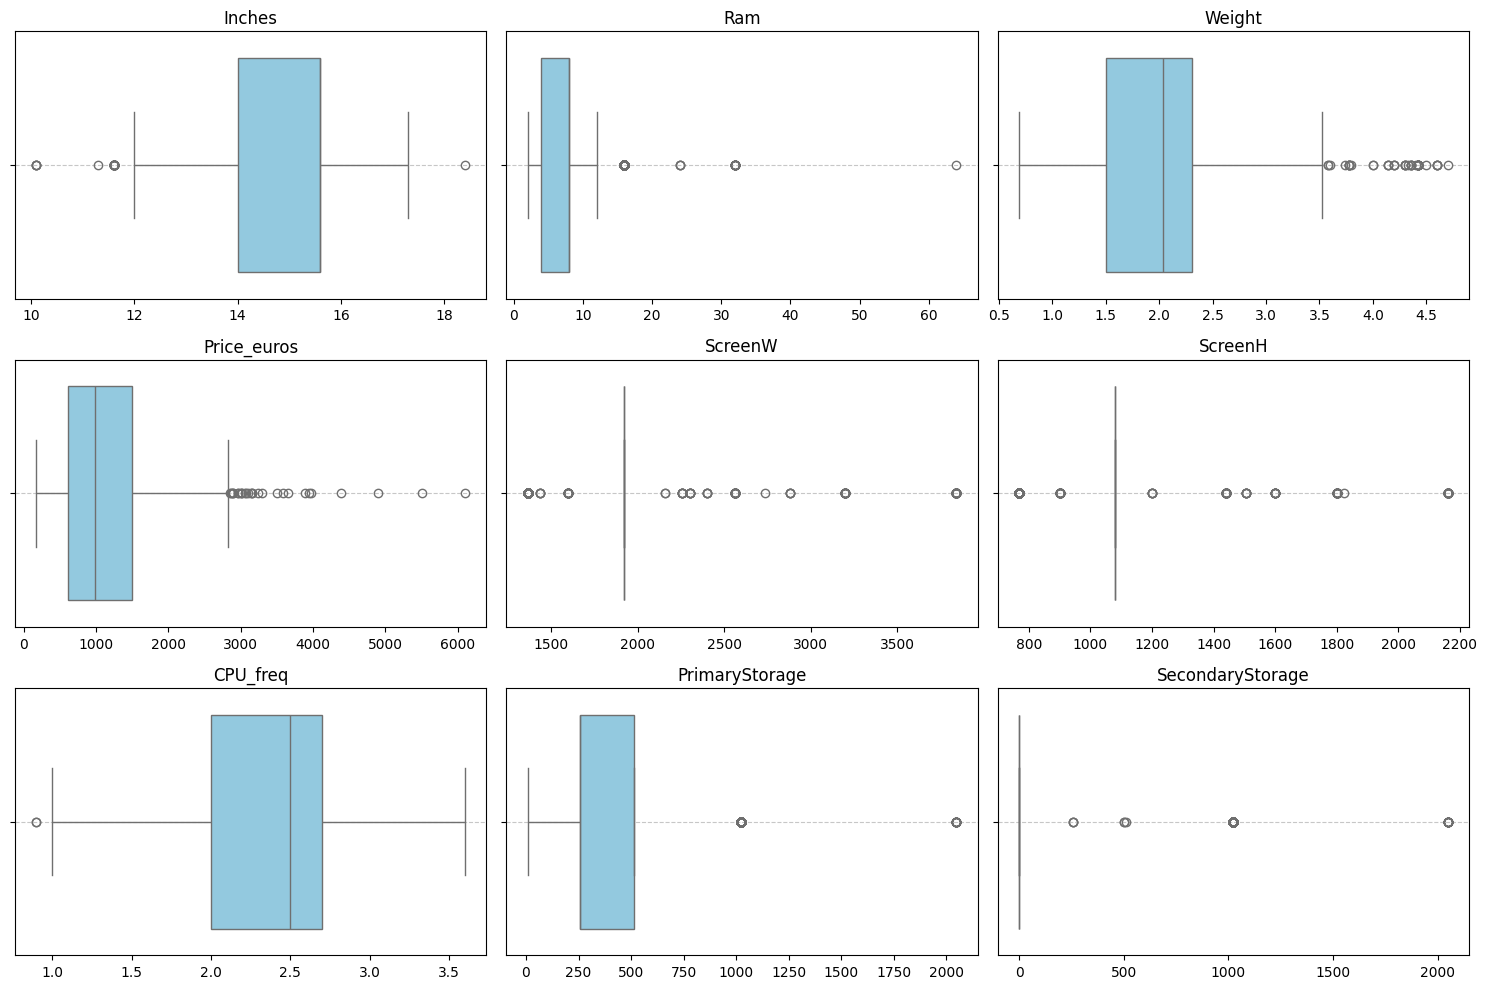

In [6]:
# Crear boxplots para cada columna num√©rica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=laptop_data, x=col, color='skyblue')
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


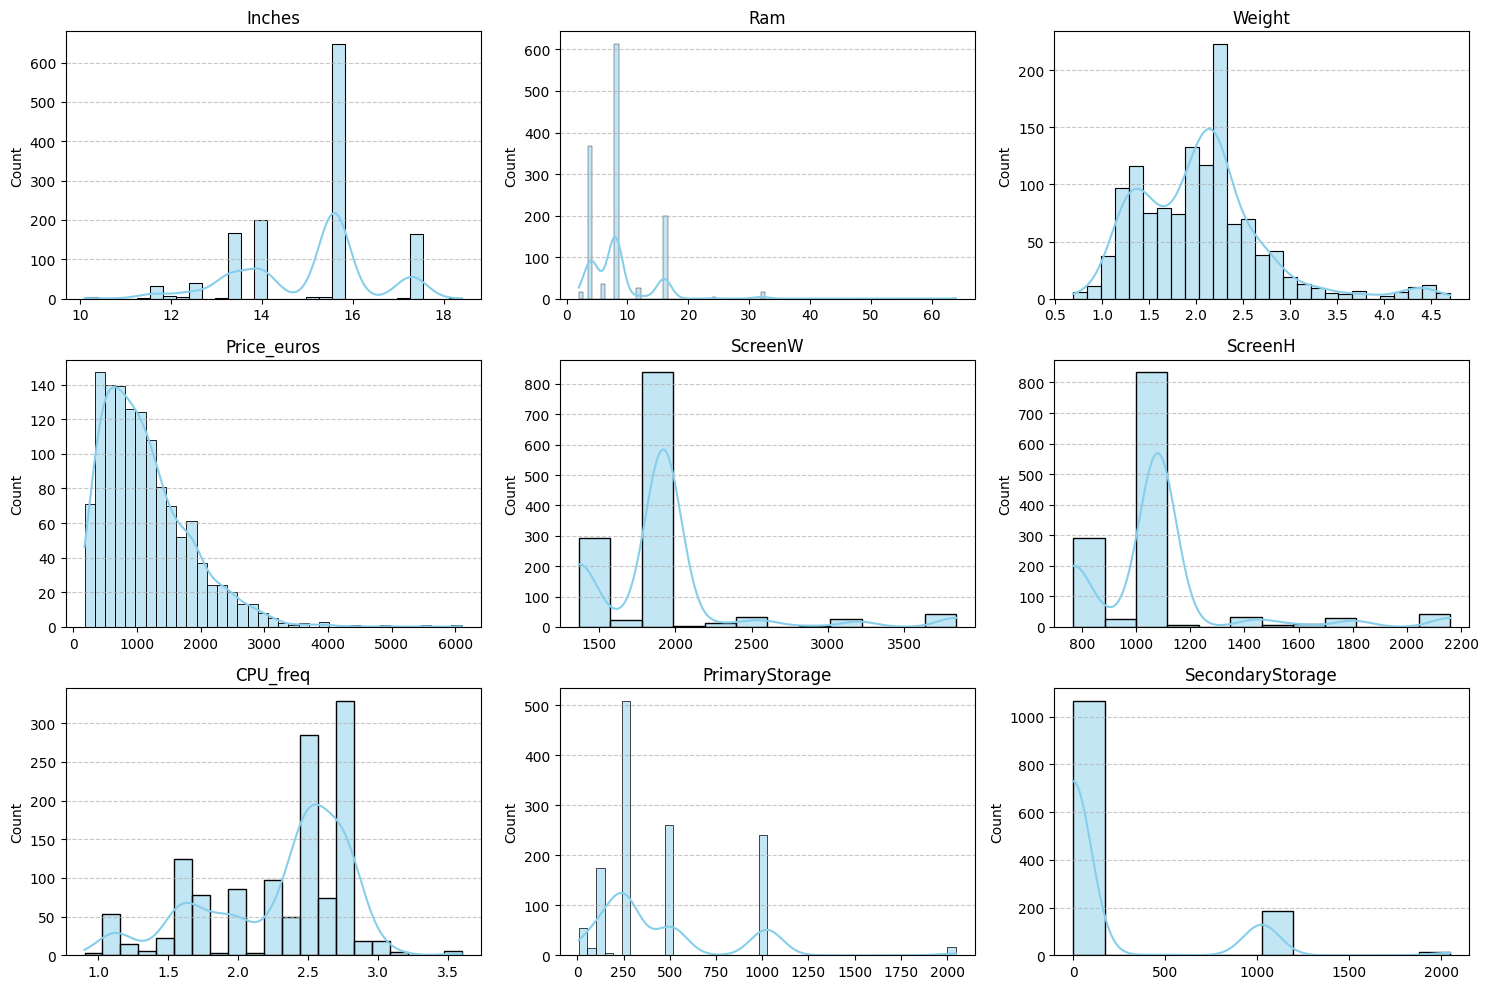

In [7]:
# Crear boxplots para cada columna num√©rica
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=laptop_data, x=col, color='skyblue', kde=True)
    plt.title(f'{col}', fontsize=12)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [8]:
def plot_histogram_and_boxplot(data, columns):
    """
    Genera un histograma y un boxplot para cada columna dada.

    Args:
    data (DataFrame): Dataset que contiene las columnas.
    columns (list): Lista de nombres de columnas a graficar.
    """
    for column in columns:
        if column not in data.columns:
            print(f"La columna '{column}' no existe en el dataset.")
            continue
        
        # Crear una figura con dos subplots
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        fig.suptitle(f'An√°lisis de {column}', fontsize=16)
        
        # Histograma
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0], color="skyblue")
        axes[0].set_title(f'Histograma de {column}')
        axes[0].set_xlabel(column)
        axes[0].set_ylabel('Frecuencia')
        
        # Boxplot
        sns.boxplot(data[column], ax=axes[1], color="orange")
        axes[1].set_title(f'Boxplot de {column}')
        axes[1].set_xlabel(column)
        
        # Mostrar los gr√°ficos
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta para no sobreponer el t√≠tulo
        plt.show()


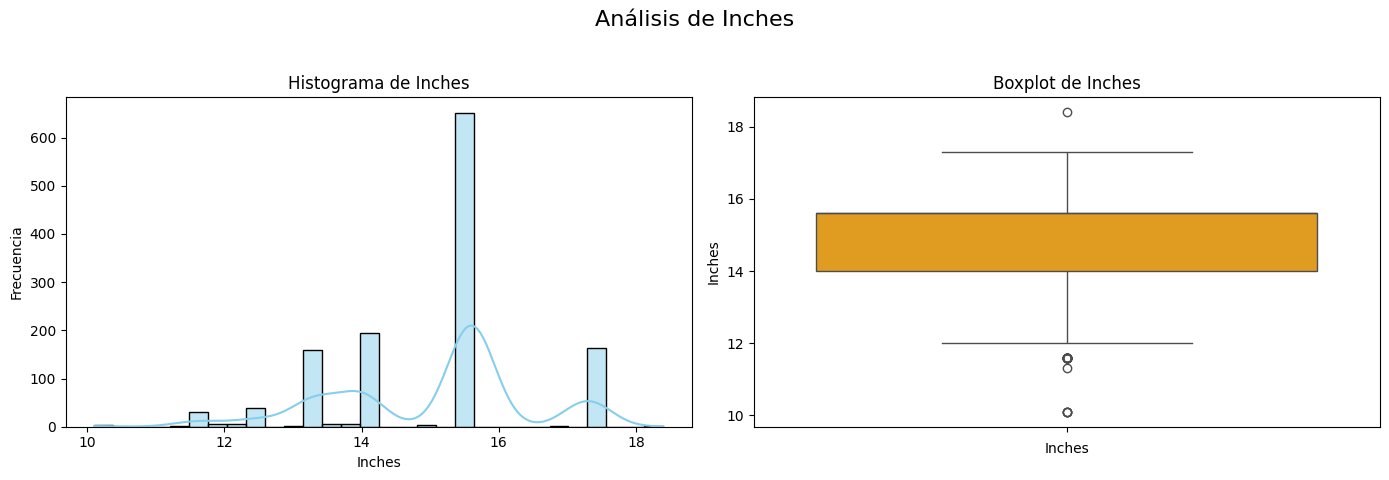

In [9]:
plot_histogram_and_boxplot(laptop_data, ['Inches'])

#### Inches (Tama√±o de Pantalla)

- **Rango t√≠pico:** La mayor√≠a de las laptops tienen tama√±os de pantalla entre 13 y 15 pulgadas, lo que refleja una preferencia por tama√±os est√°ndar.  
- **Valores at√≠picos:** Se observan laptops peque√±as (11 pulgadas) y algunas significativamente grandes (17 pulgadas o m√°s). Estos extremos suelen estar orientados a la portabilidad extrema (peque√±as) o al mercado de gaming/dise√±o (grandes).  
- **Distribuci√≥n:** Leve sesgo hacia tama√±os m√°s peque√±os, indicando que laptops m√°s compactas son ligeramente m√°s frecuentes.  

**Conclusi√≥n:** Los tama√±os reflejan un equilibrio entre portabilidad y funcionalidad, con excepciones notables en ambos extremos.


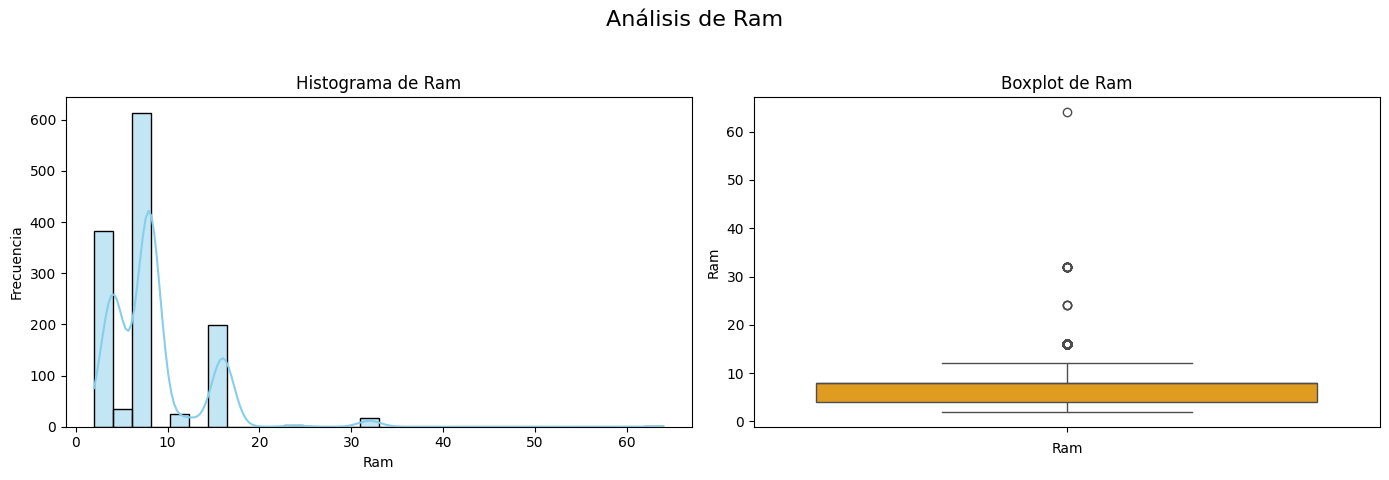

In [10]:
plot_histogram_and_boxplot(laptop_data, ['Ram'])

#### RAM

- **Rango t√≠pico:** La mayor√≠a de las laptops tienen entre 8 GB y 16 GB de RAM, que es la configuraci√≥n est√°ndar en laptops modernas.  
- **Valores at√≠picos:** Se observan laptops con RAM alta (32 GB o 64 GB), t√≠picas de estaciones de trabajo o gaming de alta gama.  
- **Distribuci√≥n:** No hay un sesgo claro, pero los valores extremos resaltan el incremento en la demanda de RAM en modelos premium.  

**Conclusi√≥n:** El mercado parece centrado en configuraciones que equilibran precio y rendimiento, con opciones premium para usuarios m√°s exigentes.


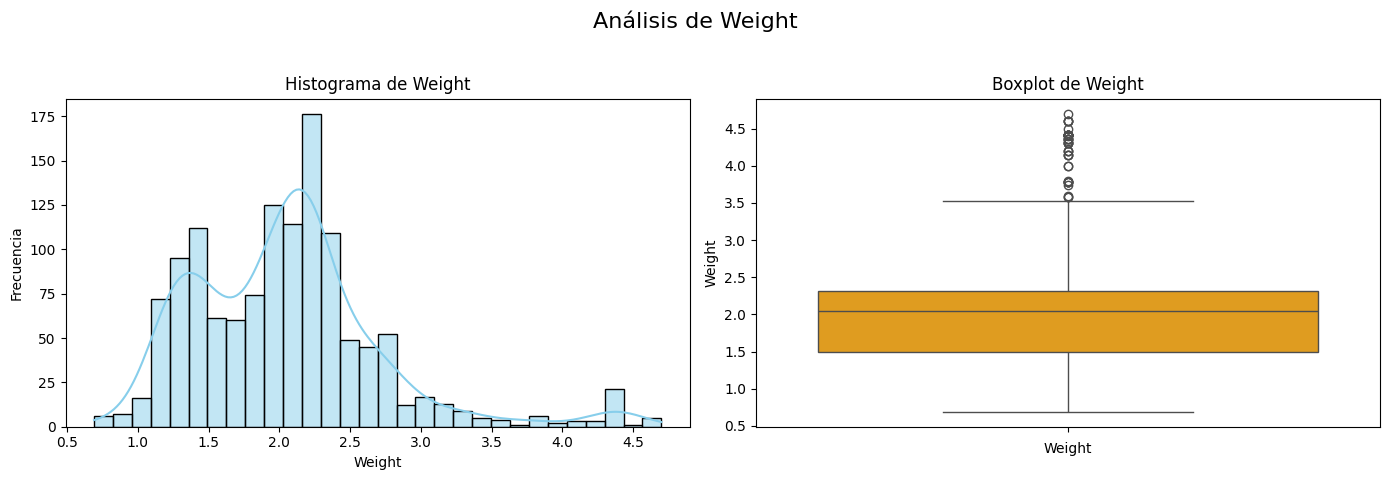

In [11]:
plot_histogram_and_boxplot(laptop_data, ['Weight'])

#### Weight (Peso)

- **Rango t√≠pico:** La mayor√≠a de las laptops pesan entre 1 y 2 kg, lo que muestra una tendencia hacia la portabilidad.  
- **Valores at√≠picos:** Laptops ultraligeras (< 1 kg) o muy pesadas (> 2.5 kg), estas √∫ltimas suelen estar relacionadas con gaming o estaciones de trabajo.  
- **Distribuci√≥n:** Sesgo leve hacia pesos m√°s bajos, con m√°s frecuencia en laptops ligeras.  

**Conclusi√≥n:** El peso de las laptops est√° dise√±ado para ser funcionalmente port√°til, aunque las especializaciones en gaming y productividad aumentan el peso.


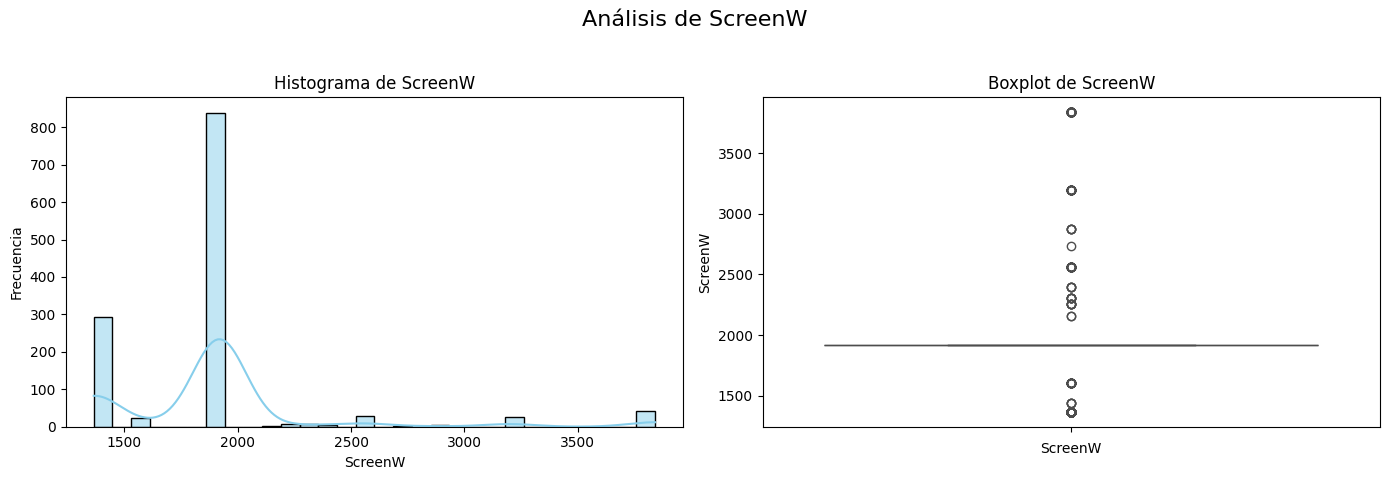

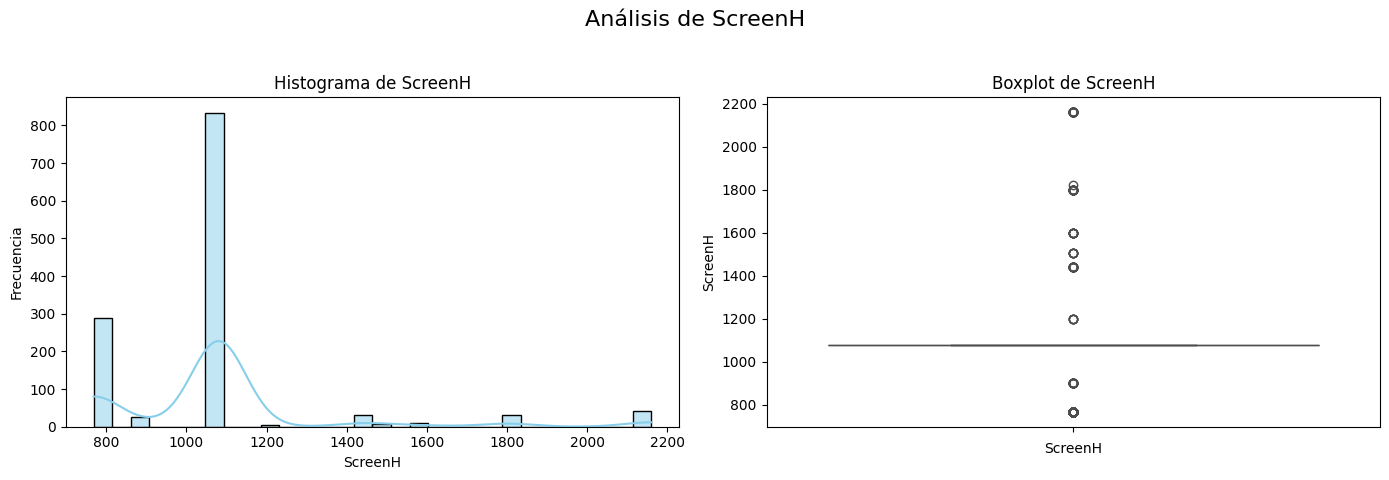

In [12]:
plot_histogram_and_boxplot(laptop_data, ['ScreenW', 'ScreenH'])

In [ ]:
(laptop_data['ScreenW'].value_counts(),laptop_data['ScreenH'].value_counts())

(1920    838
 1366    290
 3840     43
 2560     29
 3200     25
 1600     23
 2304      6
 2256      6
 1440      4
 2880      4
 2400      4
 2160      2
 2736      1
 Name: ScreenW, dtype: int64,
 1080    833
 768     290
 2160     43
 1440     31
 1800     29
 900      27
 1600     10
 1504      6
 1200      5
 1824      1
 Name: ScreenH, dtype: int64)

#### Screen Height y Width (Resoluci√≥n de Pantalla)

- **Rango t√≠pico:** Resoluciones est√°ndar Full HD (1920x1080) son las m√°s comunes, con variaciones hacia resoluciones m√°s altas en laptops premium.  
- **Valores at√≠picos:** Algunas laptops tienen resoluciones superiores (4K y m√°s), destinadas a tareas profesionales o gaming.  
- **Distribuci√≥n:** Las alturas y anchos tienden a alinearse proporcionalmente, con frecuencias m√°s altas en relaciones est√°ndar como 16:9.  

**Conclusi√≥n:** La resoluci√≥n de pantalla se ajusta a est√°ndares establecidos, con opciones de alta resoluci√≥n como diferenciador en el mercado premium.


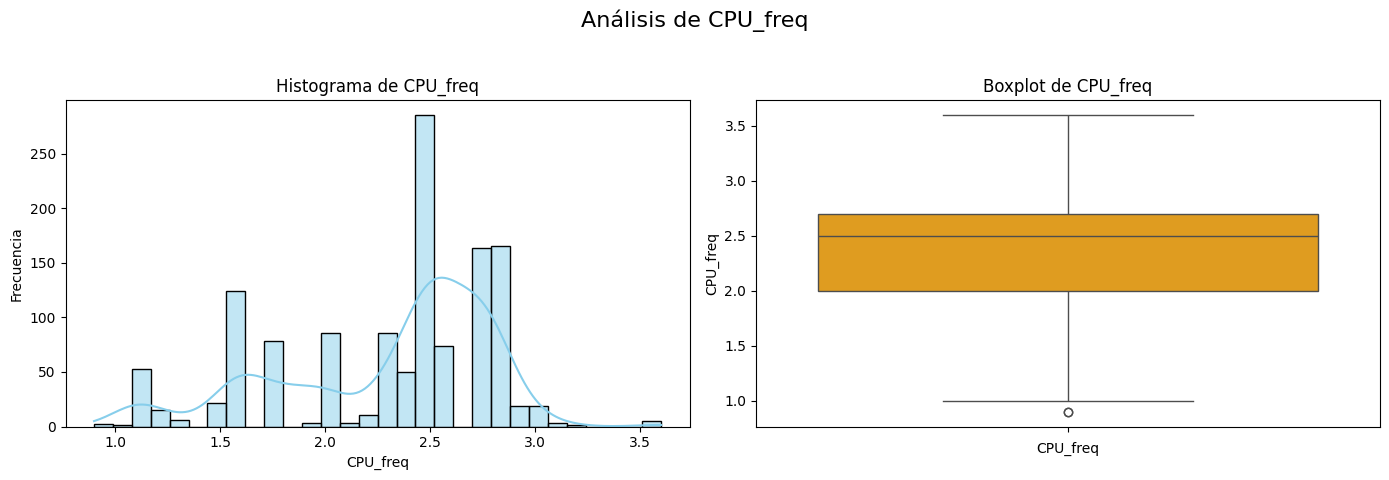

In [14]:
plot_histogram_and_boxplot(laptop_data, ['CPU_freq'])

#### Cpu_Freq (Frecuencia del Procesador)

- **Rango t√≠pico:** La mayor√≠a de los procesadores tienen frecuencias entre 2.0 y 3.0 GHz.  
- **Valores at√≠picos:** Frecuencias superiores (> 4.0 GHz) son raras y corresponden a modelos de alto rendimiento.  
- **Distribuci√≥n:** Los datos se concentran en valores intermedios, reflejando un equilibrio entre potencia y eficiencia energ√©tica.  

**Conclusi√≥n:** Las frecuencias de CPU est√°n optimizadas para satisfacer tareas generales, con modelos espec√≠ficos destacando por su velocidad.


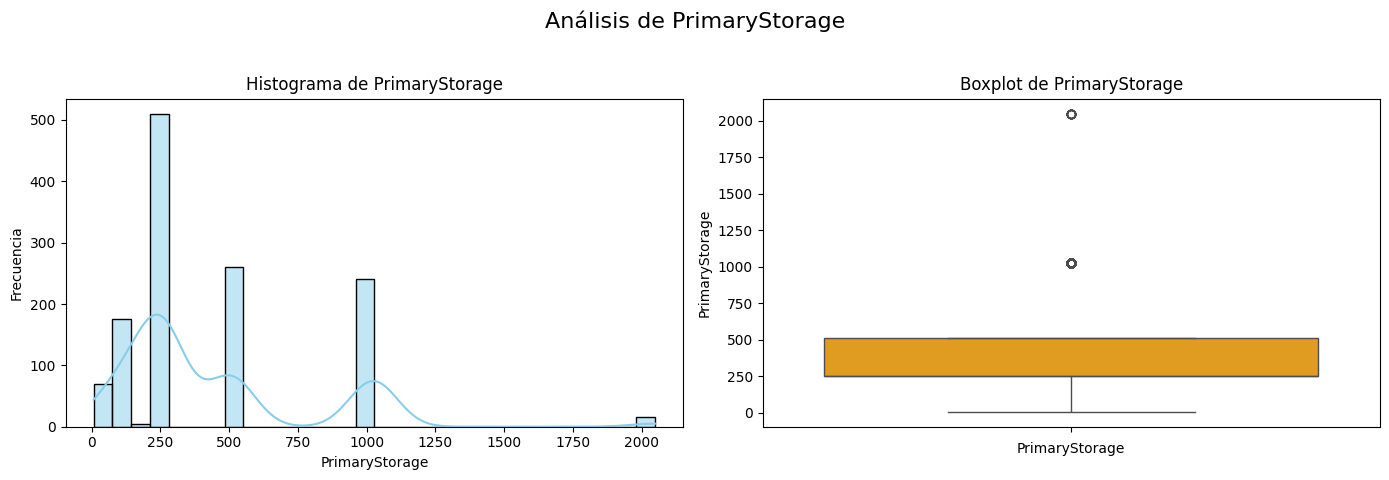

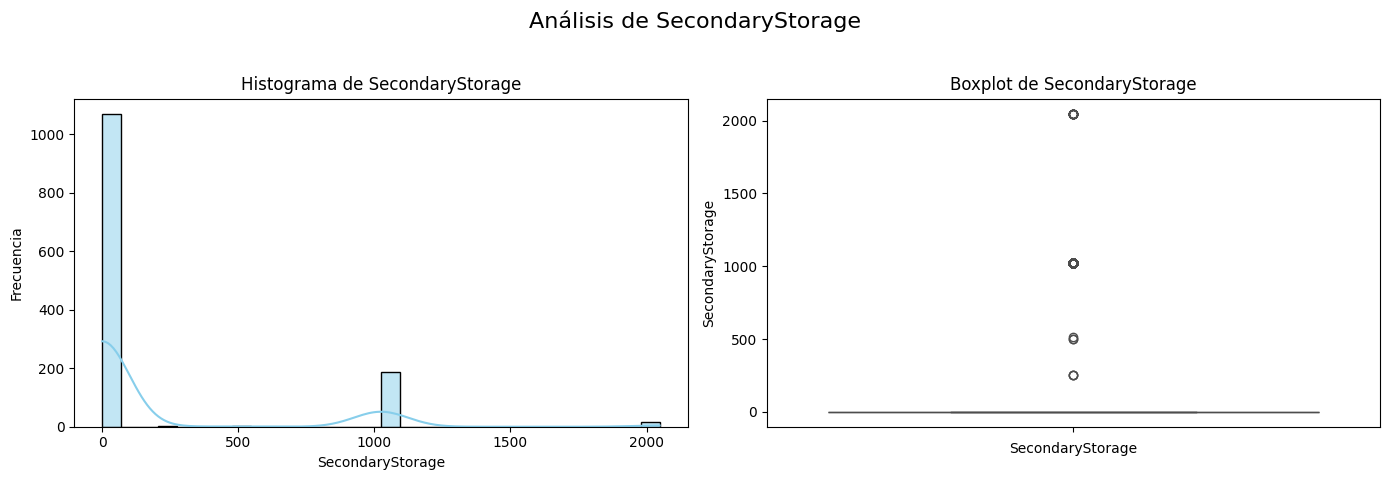

In [15]:
plot_histogram_and_boxplot(laptop_data, ['PrimaryStorage', 'SecondaryStorage'])

In [ ]:
(laptop_data['PrimaryStorageType'].value_counts(), laptop_data['SecondaryStorageType'].value_counts())

(SSD              837
 HDD              359
 Flash Storage     71
 Hybrid             8
 Name: PrimaryStorageType, dtype: int64,
 No        1067
 HDD        202
 SSD          4
 Hybrid       2
 Name: SecondaryStorageType, dtype: int64)

#### Primary Storage (Almacenamiento principal)

- **Rango t√≠pico:** Entre 256 GB y 512 GB (SSD) son los m√°s frecuentes.  
- **Valores at√≠picos:** Modelos con almacenamiento de 1 TB o m√°s, dise√±ados para usuarios que manejan grandes vol√∫menes de datos.  
- **Distribuci√≥n:** Se observa una amplia variabilidad, indicando opciones diversas para necesidades espec√≠ficas.  

**Conclusi√≥n:** Las laptops modernas tienden hacia discos SSD para el almacenamiento principal, con almacenamiento secundario siendo menos com√∫n y enfocado en necesidades espec√≠ficas.

#### Secondary Storage (Almacenamiento secundario)

- **Rango t√≠pico:** Muchas laptops no tienen almacenamiento secundario. Aquellas que s√≠ lo tienen suelen usar discos HDD de alta capacidad (> 1 TB).  
- **Distribuci√≥n:** La presencia de almacenamiento secundario es menos com√∫n y depende del enfoque del modelo (gaming o estaciones de trabajo).  

**Conclusi√≥n:** Las laptops modernas tienden hacia discos SSD para el almacenamiento principal, con almacenamiento secundario siendo menos com√∫n y enfocado en necesidades espec√≠ficas.


--- 

#### Conclusiones Generales

Los histogramas y boxplots revelan que las laptops est√°n dise√±adas principalmente para usuarios promedio, con especificaciones que equilibran funcionalidad y costo. Sin embargo, hay segmentos claros orientados a usuarios especializados, como gamers, profesionales creativos y usuarios que buscan portabilidad extrema.

---

### 2.4 An√°lisis de Columnas Categ√≥ricas

In [17]:
# Resumen para variables categ√≥ricas: n√∫mero de valores √∫nicos
categorical_summary = laptop_data.select_dtypes(include='object').nunique().to_frame(name='Unique Values')
categorical_summary

Unique Values
Company                          19
Product                         618
TypeName                          6
OS                                9
Screen                            4
Touchscreen                       2
IPSpanel                          2
RetinaDisplay                     2
CPU_company                       3
CPU_model                        93
PrimaryStorageType                4
SecondaryStorageType              4
GPU_company                       4
GPU_model                       110

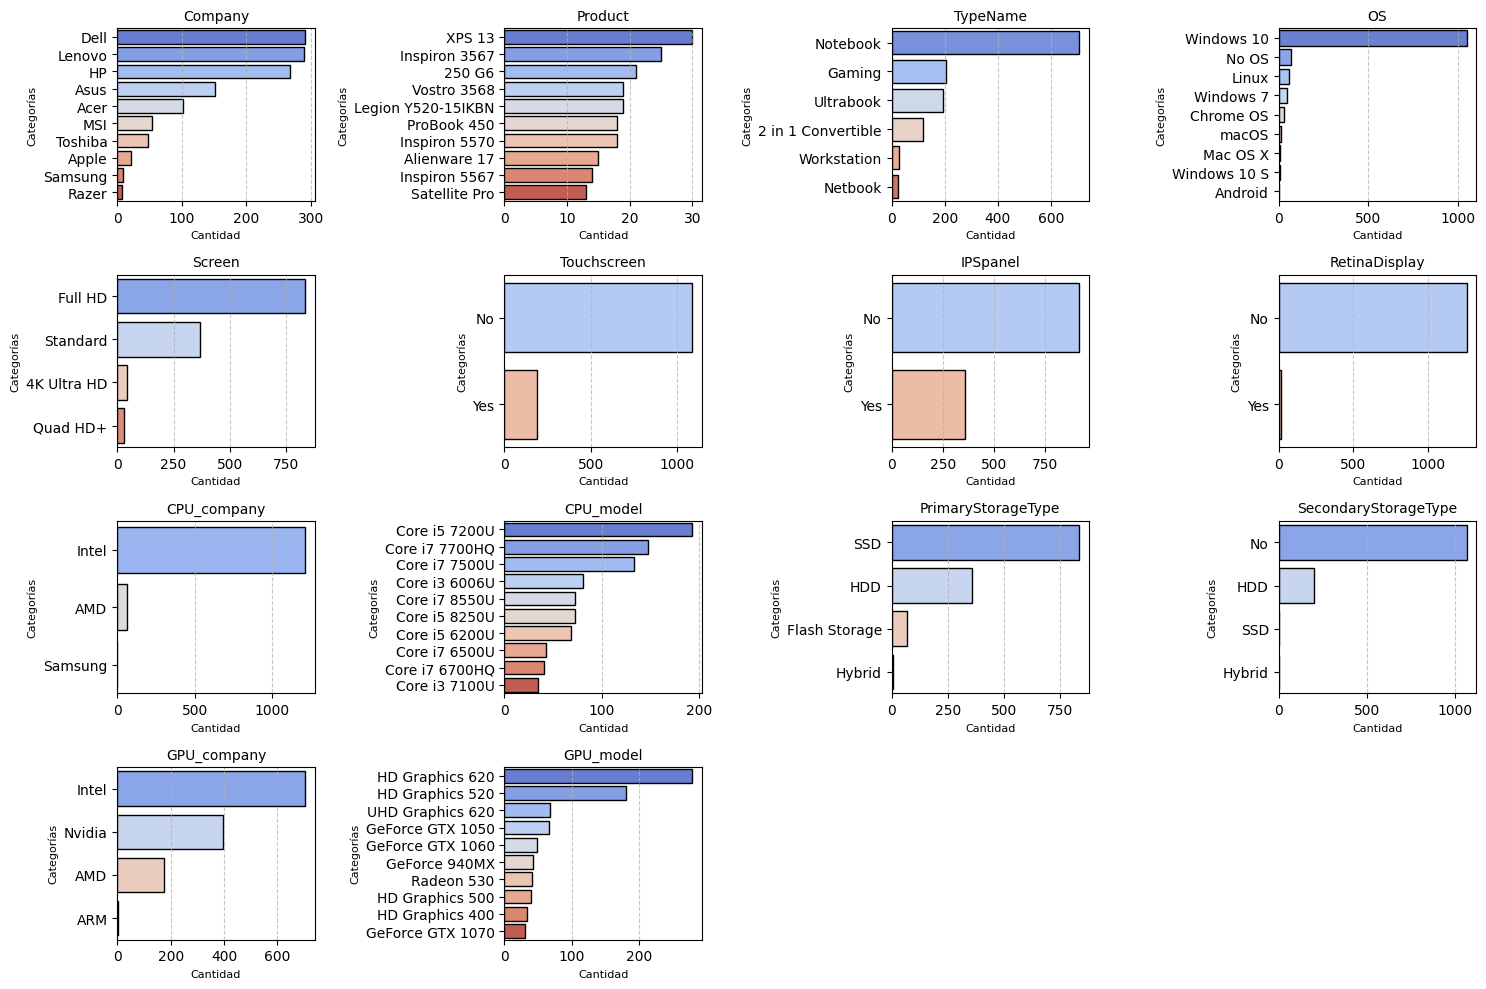

In [18]:
# Graficar los valores √∫nicos de las columnas categ√≥ricas
categorical_columns = laptop_data.select_dtypes(include='object').columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    unique_counts = laptop_data[col].value_counts().head(10)  # Top 10 categor√≠as
    sns.barplot(
        y=unique_counts.index, 
        x=unique_counts.values, 
        palette='coolwarm', 
        edgecolor='black', 
        hue=unique_counts.index, 
        dodge=False 
    )
    plt.title(col, fontsize=10)
    plt.xlabel('Cantidad', fontsize=8)
    plt.ylabel('Categor√≠as', fontsize=8)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


`1. Company`
- Las marcas m√°s representadas son **HP**, **Dell** y **Lenovo**, lo que sugiere que estas dominan el mercado.  
- Marcas como **Apple** tienen una menor frecuencia, lo que podr√≠a deberse a su enfoque en un segmento premium o de nicho.  
- La diversidad de fabricantes es moderada, con varias marcas menos conocidas presentes, pero en menor proporci√≥n.  

`2. Product`
- La distribuci√≥n est√° muy dispersa, con varios modelos espec√≠ficos que aparecen una o dos veces.  
- Algunos modelos como **Inspiron** o **Pavilion** podr√≠an destacar en frecuencia debido a su popularidad dentro de marcas como Dell o HP.  
- Esto refleja una alta variedad de opciones en el mercado, dificultando identificar l√≠deres claros m√°s all√° de las marcas principales.  

`3. TypeName`
- Las categor√≠as m√°s comunes son **Notebook** y **Ultrabook**, lo que indica que el mercado est√° orientado hacia dispositivos port√°tiles ligeros y vers√°tiles.  
- **Gaming** y **Workstation** son menos frecuentes, reflejando su enfoque en usuarios m√°s especializados.  
- La categor√≠a **2 in 1 Convertible** es notable, destacando la tendencia hacia dispositivos h√≠bridos.  

`4. OS (Sistema Operativo)`
- Windows domina ampliamente, seguido por macOS. Esto confirma la popularidad de Windows en laptops comerciales y de uso general.  
- Otros sistemas como Linux o Chrome OS tienen una representaci√≥n marginal, probablemente dirigidos a nichos espec√≠ficos.  

`5. Screen (Resoluci√≥n de pantalla)`
- Las resoluciones **Full HD (1920x1080)** son las m√°s comunes, confirmando que este est√°ndar satisface la mayor√≠a de las necesidades de los usuarios.  
- Resoluciones m√°s altas, como **4K**, aparecen menos frecuentemente, sugiriendo su asociaci√≥n con dispositivos premium o de uso profesional.  
- Resoluciones m√°s bajas (como 1366x768) a√∫n est√°n presentes, posiblemente en laptops m√°s econ√≥micas o antiguas.  

`6. Touchscreen`
- La mayor√≠a de las laptops no tienen pantallas t√°ctiles, lo que podr√≠a reflejar un enfoque en dispositivos tradicionales.  
- Los dispositivos con pantallas t√°ctiles est√°n presentes, pero en menor proporci√≥n, probablemente en ultrabooks o modelos convertibles.  

`7. IPSpanel`
- La mayor√≠a de las laptops no utilizan paneles IPS, lo que sugiere que los paneles est√°ndar son suficientes para el consumidor promedio.  
- Los paneles IPS, m√°s comunes en dispositivos premium o orientados al dise√±o gr√°fico, son menos frecuentes.  

`8. RetinaDisplay`
- La representaci√≥n de pantallas Retina est√° limitada, lo cual es l√≥gico, ya que este t√©rmino est√° asociado exclusivamente con dispositivos Apple.  

`9. CPU_company`
- **Intel** domina ampliamente, seguido por **AMD** en una proporci√≥n significativamente menor.  
- Otras marcas son pr√°cticamente inexistentes, lo que refleja la hegemon√≠a de Intel y AMD en el mercado de procesadores para laptops.  

`10. CPU_model`
- Existe una gran diversidad de modelos de CPU, reflejando la segmentaci√≥n del mercado seg√∫n el rendimiento y el precio.  
- Modelos como **Core i5** e **i7** de Intel probablemente lideran, dado su equilibrio entre costo y rendimiento.  

`11. PrimaryStorageType`
- Los discos **SSD** dominan, indicando la transici√≥n generalizada hacia este tipo de almacenamiento por su velocidad y eficiencia.  
- Los HDD todav√≠a est√°n presentes, probablemente en laptops econ√≥micas o con grandes capacidades de almacenamiento.  

`12. SecondaryStorageType`
- Muchas laptops no tienen almacenamiento secundario, lo que sugiere una tendencia hacia configuraciones simplificadas con un solo tipo de almacenamiento.  
- Aquellas que tienen almacenamiento secundario tienden a usar HDD, probablemente para complementar el almacenamiento r√°pido del SSD.  

`13. GPU_company`
- **NVIDIA** domina en GPUs dedicadas, lo que refleja su liderazgo en el segmento de gaming y computaci√≥n gr√°fica.  
- **Intel** lidera en GPUs integradas, siendo una opci√≥n est√°ndar para tareas no intensivas.  
- AMD tiene una representaci√≥n menor, pero a√∫n relevante en el mercado de GPUs.  

`14. GPU_model`
- Hay una alta diversidad de modelos, lo que refleja un mercado segmentado seg√∫n necesidades espec√≠ficas de rendimiento gr√°fico.  
- Modelos b√°sicos dominan, mientras que GPUs de gama alta, como las de la serie NVIDIA GTX/RTX, son menos frecuentes y probablemente est√°n asociadas a laptops gaming o estaciones de trabajo.  


## 3. Analisis inferencial de los datos

#### 3.1 An√°lisis de los precios

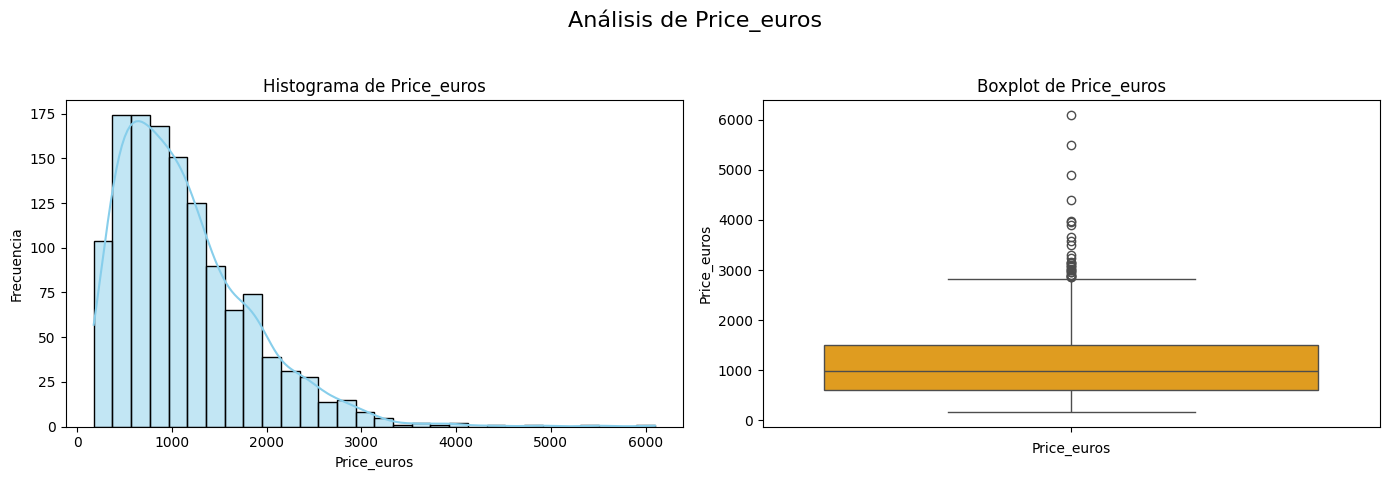

In [19]:
plot_histogram_and_boxplot(laptop_data, ['Price_euros'])

#### Histograma de `Price_euros`

- **Distribuci√≥n asim√©trica (sesgo positivo):**
  - El histograma muestra que la mayor√≠a de los precios est√°n concentrados en el rango entre 500 y 1500 euros.
  - La cola derecha indica la presencia de algunos laptops con precios significativamente m√°s altos (modelos premium).

- **Densidad baja en precios altos:**
  - Hay una ca√≠da dr√°stica en la frecuencia conforme los precios aumentan m√°s all√° de los 2000 euros, sugiriendo que estos modelos no son comunes en el mercado.

- **Pico en el rango intercuart√≠lico (IQR):**
  - Los valores m√°s densos parecen estar entre 800 y 1200 euros, que es el rango t√≠pico para laptops de gama media.

#### Boxplot  de `Price_euros`

- **Presencia de valores at√≠picos (outliers):**
  - Hay m√∫ltiples puntos fuera del l√≠mite superior del bigote, indicando modelos con precios excepcionalmente altos.
  - Estos valores at√≠picos representan laptops de alta gama, estaciones de trabajo o equipos dise√±ados para prop√≥sitos espec√≠ficos como gaming extremo o edici√≥n profesional.

- **Rango intercuart√≠lico (IQR):**
  - El rango t√≠pico de precios (IQR) est√° entre 500 y 1500 euros, lo que incluye la mayor√≠a de las laptops est√°ndar.

- **Mediana de precios:**
  - La l√≠nea dentro del box indica que la mediana de precios est√° por debajo del centro del IQR, lo que confirma un sesgo positivo.

- **Simetr√≠a del rango inferior:**
  - El bigote inferior est√° m√°s cerca del rango intercuart√≠lico, lo que refleja que hay pocos modelos con precios extremadamente bajos.


#### Distribuci√≥n de `prices_euros`

Seg√∫n el histograma de la columna `prices_euros`, parece que esta variable no sigue una distribuci√≥n normal debido a su asimetr√≠a positiva (sesgo hacia la derecha). Sin embargo, con base en su forma, podr√≠a seguir una distribuci√≥n Log-Normal.

**Caracter√≠sticas de la distribuci√≥n Log-Normal:**
- Es com√∫n en datos de precios, ya que estos no pueden tomar valores negativos.
- La mayor√≠a de los valores est√°n concentrados en el rango m√°s bajo, pero hay una cola larga hacia la derecha.

**Justificaci√≥n:**
El histograma muestra una acumulaci√≥n en los precios bajos (500-1500 euros) y una cola hacia precios m√°s altos, lo cual es t√≠pico de esta distribuci√≥n.


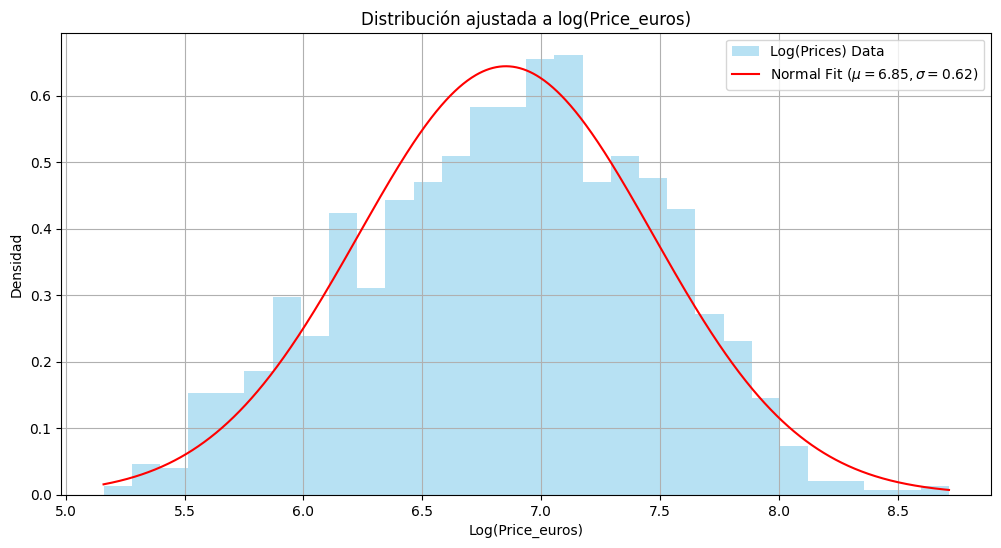

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Filtrar valores de Price_euros
price_data = laptop_data['Price_euros'].dropna()

# Aplicar logaritmo natural para modelar como distribuci√≥n log-normal
log_prices = np.log(price_data)

# Ajustar una distribuci√≥n normal a los datos transformados
#mu, sigma = stats.norm.fit(log_prices)
mu = np.mean(log_prices)  # Estimador de la Media
sigma = np.sqrt(np.mean((log_prices - mu)**2))  # Estimador de la desviaci√≥n est√°ndar

# Graficar el ajuste
plt.figure(figsize=(12, 6))

# Histograma de los datos transformados
plt.hist(log_prices, bins=30, density=True, alpha=0.6, color='skyblue', label='Log(Prices) Data')

# Distribuci√≥n ajustada
x = np.linspace(log_prices.min(), log_prices.max(), 1000)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r-', label=f'Normal Fit ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

plt.title("Distribuci√≥n ajustada a log(Price_euros)")
plt.xlabel("Log(Price_euros)")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


#### Conclusiones de la distribuci√≥n Log-Normal de `Price_euros` seg√∫n el el an√°lisis gr√°fico

Con base en el ajuste realizado, los datos transformados mediante el logaritmo natural (`log(Price_euros)`) parecen seguir una distribuci√≥n normal razonablemente bien. Esto implica que los precios originales (`Price_euros`) se ajustan a una distribuci√≥n log-normal.

Una distribuci√≥n log-normal significa que los precios bajos son m√°s frecuentes, mientras que los precios altos ocurren con menor frecuencia pero tienen un impacto significativo.

Este comportamiento es com√∫n en mercados donde los valores extremos (como laptops premium) tienen gran importancia en comparaci√≥n con productos regulares.


#### Prueba de Bondad de Ajuste contra una Distribuci√≥n Log-Normal

Entonces con el objetivo de corroborar lo concluido, se va realiza una prueba de bondad de ajuste contra una distribuci√≥n log-normal. 

Para realizar la prueba, seguimos un enfoque similar al caso normal. Sin embargo, ajustamos los par√°metros para la distribuci√≥n log-normal y usamos estas estimaciones para calcular las frecuencias esperadas.

`Pasos para la prueba de bondad de ajuste para distribuci√≥n log-normal`

1. **Definir hip√≥tesis:**
    - $ H_0 $: Los datos de `prices_euros` siguen una distribuci√≥n log-normal.
    - $ H_a $: Los datos de `prices_euros` no siguen una distribuci√≥n log-normal.

2. **M√©todo:**
    - Transformar los datos con logaritmo natural: $ \log(prices\_euros) $.
    - Estimar los par√°metros $ \mu $ (media logar√≠tmica) y $ \sigma $ (desviaci√≥n est√°ndar logar√≠tmica) de los datos transformados.
    - Dividir los datos originales en intervalos (bins) y calcular las frecuencias observadas.
    - Calcular las frecuencias esperadas usando la funci√≥n de densidad acumulada (CDF) de la distribuci√≥n log-normal.
    - Calcular el estad√≠stico de prueba $ \chi^2 $:
    
    $$
    \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
    $$

3. **Grados de libertad:**
    - Grados de libertad = N√∫mero de bins - 1 - N√∫mero de par√°metros estimados (en este caso, $ \mu $ y $ \sigma $).


In [21]:
# Transformar datos al espacio logar√≠tmico
log_prices = np.log(price_data)

# Estimar par√°metros de la distribuci√≥n log-normal
mu, sigma = np.mean(log_prices), np.std(log_prices)

# Generar frecuencias observadas
observed, bins = np.histogram(price_data, bins=10)  # 10 bins arbitrarios

# Calcular frecuencias esperadas usando CDF de log-normal
expected = len(price_data) * np.diff(stats.lognorm.cdf(bins, s=sigma, scale=np.exp(mu)))

# Calcular estad√≠stico chi-cuadrado
chi_squared = np.sum((observed - expected)**2 / expected)

# Grados de libertad
df = len(bins) - 1 - 2  # 2 par√°metros estimados: mu y sigma

# Valor p
p_value = stats.chi2.sf(chi_squared, df)

# Resultados
print("Estad√≠stico chi-cuadrado:", chi_squared)
print("Grados de libertad:", df)
print("Valor p:", p_value)

if p_value > 0.05:
    print("No se rechaza H0: Los datos podr√≠an seguir una distribuci√≥n log-normal.")
else:
    print("Se rechaza H0: Los datos no siguen una distribuci√≥n log-normal.")


Estad√≠stico chi-cuadrado: 15.817895903424303
Grados de libertad: 8
Valor p: 0.045061994797469376
Se rechaza H0: Los datos no siguen una distribuci√≥n log-normal.


`Pasos para la prueba de bondad de ajuste Kolmogorov-Smirnov (KS)`

1. **Definir hip√≥tesis:**
   - \( H_0 \): Los datos de `prices_euros` siguen una distribuci√≥n log-normal.
   - \( H_a \): Los datos de `prices_euros` no siguen una distribuci√≥n log-normal.

2. **M√©todo:**
   - Transformar los datos al espacio logar√≠tmico con \( \log(\text{prices\_euros}) \).
   - Estimar los par√°metros \( \mu \) (media logar√≠tmica) y \( \sigma \) (desviaci√≥n est√°ndar logar√≠tmica) de los datos transformados.
   - Definir la CDF te√≥rica de la distribuci√≥n log-normal ajustada, utilizando \( \mu \) y \( \sigma \).
   - Comparar la CDF emp√≠rica de los datos con la CDF te√≥rica mediante el estad√≠stico de prueba KS:
     
     \[
     D = \max | F_{\text{emp√≠rica}}(x) - F_{\text{te√≥rica}}(x) |
     \]
   - Calcular el valor \( p \), que mide la probabilidad de observar un estad√≠stico igual o m√°s extremo si \( H_0 \) es verdadera.

3. **Estad√≠stico de prueba:**
   - \( D \): La m√°xima diferencia absoluta entre la CDF emp√≠rica y la CDF te√≥rica.

4. **Decisi√≥n:**
   - Comparar el valor \( p \) con el nivel de significancia (\( \alpha \), t√≠picamente 0.05):
     - Si \( p > \alpha \): No se rechaza \( H_0 \). Los datos podr√≠an seguir una distribuci√≥n log-normal.
     - Si \( p \leq \alpha \): Se rechaza \( H_0 \). Los datos no siguen una distribuci√≥n log-normal.

5. **Ventajas del test KS:**
   - No requiere agrupar datos en intervalos (bins).
   - Permite comparar directamente las distribuciones acumulativas.

6. **Limitaciones:**
   - Menos potente para detectar desviaciones en los extremos de la distribuci√≥n.
   - Sensible al tama√±o de la muestra.

In [22]:
from scipy.stats import kstest

# Transformar datos al espacio logar√≠tmico
log_prices = np.log(price_data)

# Estimar par√°metros de la distribuci√≥n log-normal
mu, sigma = np.mean(log_prices), np.std(log_prices)

# Funci√≥n de CDF de la distribuci√≥n log-normal ajustada
lognorm_cdf = lambda x: stats.lognorm.cdf(x, s=sigma, scale=np.exp(mu))

# Prueba KS
ks_stat, p_value = kstest(price_data, lognorm_cdf)

# Resultados
print("Estad√≠stico KS:", ks_stat)
print("Valor p:", p_value)

# Interpretaci√≥n del resultado
alpha = 0.05
if p_value > alpha:
    print(f"No se rechaza H0: Los datos podr√≠an seguir una distribuci√≥n log-normal. (Œ±={alpha})")
else:
    print(f"Se rechaza H0: Los datos no siguen una distribuci√≥n log-normal. (Œ±={alpha})")


Estad√≠stico KS: 0.03889163154274822
Valor p: 0.04115338259814305
Se rechaza H0: Los datos no siguen una distribuci√≥n log-normal. (Œ±=0.05)


#### Conclusiones de la prueba de bondad de ajuste

A pesar que los datos no siguen una distribuci√≥n log-normal, se puede notar un p_value cercano al umbral de 0.05, lo cual indica que los datos casi pasan la prueba de bondad de ajuste para una distribuci√≥n log-normal, pero no lo hacen de manera concluyente.

Es decir, este valor sugiere que hay cierta evidencia de que la distribuci√≥n log-normal podr√≠a ser un modelo razonable, pero no es suficientemente fuerte como para rechazar la hip√≥tesis nula de que los datos no siguen una distribuci√≥n log-normal.


---

#### 3.2 An√°lisis de categorias que distribuyen binomiales  

`Estimadores de M√°xima Verosimilitud para Distribuci√≥n Binomial`

Para una muestra binomial $ X_1, X_2, \dots, X_n $ con $ X_i \in \{0, 1\} $ su funci√≥n de verosimilitud es:

$$
L(p) = \prod_{i=1}^{n} p^{x_i} (1 - p)^{1 - x_i}
$$

Entonces su log-verosimilitud es:

$$
\ell(p) = \sum_{i=1}^{n} \left[ x_i \ln(p) + (1 - x_i) \ln(1 - p) \right]
$$

Y para encontrar su estimador necesitamos maximizar $ \ell(p) $, derivamos e igualamos a 0:

$$
\frac{d \ell(p)}{dp} = \sum \frac{x_i}{p} - \frac{n - \sum x_i}{1 - p} = 0
$$

El estimador es:

$$
\hat{p} = \frac{\sum x_i}{n} = \frac{\overline{X}}{n} = \frac{m}{n} 
$$

Donde:
- $ m $ es el n√∫mero de √©xitos
- $ \hat{p} $ es la proporci√≥n de √©xitos observados.

Y cuando se considera la proporci√≥n de √©xitos $ \hat{p} = \frac{m}{n} $, la varianza de la proporci√≥n es:

$$
\text{Var}(\hat{p}) = \text{Var}\left(\frac{\overline{X}}{n}\right) = \frac{\text{Var}(\overline{X})}{n^2} = \frac{n \cdot p \cdot (1 - p)}{n^2} = \frac{p \cdot (1 - p)}{n}
$$


In [23]:
# Columnas binarias
binary_columns = ['Touchscreen', 'IPSpanel', 'RetinaDisplay']

# Funci√≥n para calcular estimadores
def calculate_mle(binary_column):
    successes = laptop_data[binary_column].value_counts().get('Yes', 0)
    total = laptop_data[binary_column].notna().sum()
    
    # Estimador de la proporci√≥n
    p_hat = successes / total
    
    # Estimador de la varianza
    variance = p_hat * (1 - p_hat) / total
    
    # Intervalo de confianza de un 95 %
    alpha = 0.05
    Z = stats.norm.ppf(1-alpha/2)
    trust_interval = ( p_hat - np.sqrt(variance) * Z, p_hat + np.sqrt(variance) * Z)
    
    return {
        "column": binary_column,
        "successes": successes,
        "total": total,
        "p_hat": p_hat,
        "variance": variance,
        "trust_interval": trust_interval
    }

# Calcular para cada columna
results = [calculate_mle(col) for col in binary_columns]

# Mostrar resultados
for result in results:
    print(f"Columna: {result['column']}")
    print(f"  √âxitos (Yes): {result['successes']}")
    print(f"  Total: {result['total']}")
    print(f"  p_hat: {result['p_hat']:.4f}")
    print(f"  Varianza: {result['variance']:.8f}")
    print(f"  Intervalo de confianza de un 95%: {result['trust_interval']}")
    print()


Columna: Touchscreen
  √âxitos (Yes): 188
  Total: 1275
  p_hat: 0.1475
  Varianza: 0.00009860
  Intervalo de confianza de un 95%: (0.12798947143152722, 0.16691248935278652)

Columna: IPSpanel
  √âxitos (Yes): 357
  Total: 1275
  p_hat: 0.2800
  Varianza: 0.00015812
  Intervalo de confianza de un 95%: (0.25535446429875147, 0.3046455357012486)

Columna: RetinaDisplay
  √âxitos (Yes): 17
  Total: 1275
  p_hat: 0.0133
  Varianza: 0.00001032
  Intervalo de confianza de un 95%: (0.007037581579873502, 0.019629085086793167)



In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def plot_hypothesis_test(z_stat, z_critical, p_value, alpha=0.05, test_type='two-tailed'):
    x = np.linspace(-4, 4, 500)  # Eje x
    y = norm.pdf(x, 0, 1)  # Densidad de la distribuci√≥n normal est√°ndar
    
    plt.figure(figsize=(10, 6))
    
    # Graficar la distribuci√≥n normal est√°ndar
    plt.plot(x, y, label='Distribuci√≥n Normal Est√°ndar', color='blue')

    # Regiones cr√≠ticas
    if test_type == 'two-tailed':
        critical_regions = [(-z_critical, -4), (z_critical, 4)]
        critical_lines = [-z_critical, z_critical]
    elif test_type == 'right-tailed':
        critical_regions = [(z_critical, 4)]
        critical_lines = [z_critical]
    elif test_type == 'left-tailed':
        critical_regions = [(-4, -z_critical)]
        critical_lines = [-z_critical]
    else:
        raise ValueError("El tipo de prueba debe ser 'two-tailed', 'right-tailed' o 'left-tailed'")
    
    # Sombrear regiones cr√≠ticas
    for region in critical_regions:
        x_fill = np.linspace(region[0], region[1], 500)
        plt.fill_between(x_fill, 0, norm.pdf(x_fill, 0, 1), color='red', alpha=0.4, label='Regi√≥n Cr√≠tica')

    # L√≠neas de los valores cr√≠ticos
    for critical in critical_lines:
        plt.axvline(critical, color='orange', linestyle='--', linewidth=1.5, label=f'Z cr√≠tico = {critical:.2f}')
    
    # L√≠nea del estad√≠stico Z observado
    plt.axvline(z_stat, color='green', linestyle='--', linewidth=2, label=f'Estad√≠stico Z = {z_stat:.2f}')
    
    # Configuraci√≥n del gr√°fico
    plt.title("Prueba de Hip√≥tesis: Visualizaci√≥n de Resultados", fontsize=14)
    plt.xlabel("Z", fontsize=12)
    plt.ylabel("Densidad", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.4)
    plt.show()

#### Prueba de hip√≥tesis 1

Supongamos que hist√≥ricamente, el 30% de las laptops tienen Touchscreen. Queremos determinar si esta proporci√≥n ha cambiado en el conjunto de datos actual.


- **Hip√≥tesis nula ($H_0$):** La proporci√≥n de laptops con Touchscreen sigue siendo del 30%.  
  $H_0: p = 0.30$

- **Hip√≥tesis alternativa ($H_a$):** La proporci√≥n de laptops con Touchscreen es diferente del 30%.  
  $H_a: p \neq 0.30$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**C√°lculo del estad√≠stico de prueba**

- Usamos la f√≥rmula del estad√≠stico $Z$ para proporciones:

$$
Z = \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}}
$$

donde:

- $\hat{p}$: Proporci√≥n observada en los datos.
- $p_0$: Proporci√≥n hist√≥rica o hip√≥tesis nula ($p_0 = 0.30$).
- $n$: Tama√±o de la muestra.

**Regi√≥n cr√≠tica**

Como es una prueba bilateral (dos colas), rechazaremos $H_0$ si:

$$
|Z| > Z_{\alpha / 2}
$$

Con $\alpha = 0.05$, tenemos $Z_{\alpha / 2} = 1.96$.



Tama√±o de la muestra (n): 1275
Proporci√≥n observada (pÃÇ): 0.1475
Estad√≠stico Z: -11.8865
Valor cr√≠tico Z: ¬±1.9600
Valor p: 0.0000
Rechazamos la hip√≥tesis nula (H0). La proporci√≥n ha cambiado significativamente.


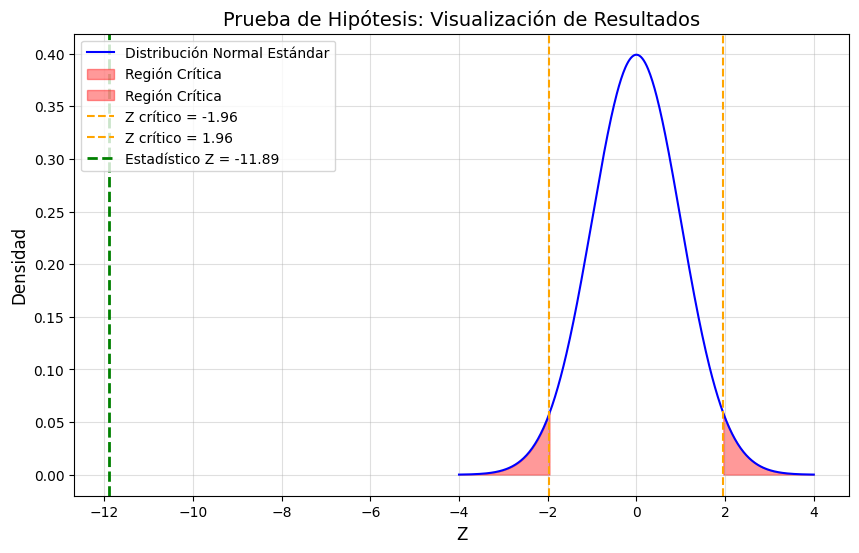

In [25]:
# Datos
touchscreen_counts = laptop_data['Touchscreen'].value_counts()
n = touchscreen_counts.sum()  # Tama√±o de la muestra
successes = touchscreen_counts['Yes']  # Laptops con Touchscreen
p_hat = successes / n  # Proporci√≥n observada
p_0 = 0.30  # Proporci√≥n hist√≥rica

# Estad√≠stico Z
z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Valor cr√≠tico y p-valor
z_critical = stats.norm.ppf(1 - 0.05 / 2)  # Dos colas
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Resultados
print(f"Tama√±o de la muestra (n): {n}")
print(f"Proporci√≥n observada (pÃÇ): {p_hat:.4f}")
print(f"Estad√≠stico Z: {z_stat:.4f}")
print(f"Valor cr√≠tico Z: ¬±{z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisi√≥n
if abs(z_stat) > z_critical:
    print("Rechazamos la hip√≥tesis nula (H0). La proporci√≥n ha cambiado significativamente.")
else:
    print("No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que la proporci√≥n ha cambiado.")

# Aplicaci√≥n para el caso de Touchscreen
plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='two-tailed')


#### Prueba de hip√≥tesis 2

Queremos determinar si el porcentaje de laptops con IPSpanel es mayor al 40% en el conjunto de datos.

- **Hip√≥tesis nula ($H_0$):** La proporci√≥n de laptops con IPSpanel es menor o igual al 40%.  
  $H_0: p \leq 0.40$

- **Hip√≥tesis alternativa ($H_a$):** La proporci√≥n de laptops con IPSpanel es mayor al 40%. 
  $H_a: p > 0.40$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**C√°lculo del estad√≠stico de prueba**

- Usamos la f√≥rmula del estad√≠stico $Z$ para proporciones:

$$
Z = \frac{\hat{p} - p_0}{\sqrt{p_0 (1 - p_0) / n}}
$$

donde:

- $\hat{p}$: Proporci√≥n observada.
- $p_0$: Proporci√≥n de la hip√≥tesis nula ($p_0 = 0.40$).
- $n$: Tama√±o de la muestra.

**Regi√≥n cr√≠tica**

- Esta es una prueba de cola superior. Rechazaremos $H_0$ si:

$$
Z > Z_\alpha
$$


Tama√±o de la muestra (n): 1275
Proporci√≥n observada (pÃÇ): 0.2800
Estad√≠stico Z: -8.7464
Valor cr√≠tico Z: 1.6449
Valor p: 1.0000
No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que la proporci√≥n es mayor al 40%.


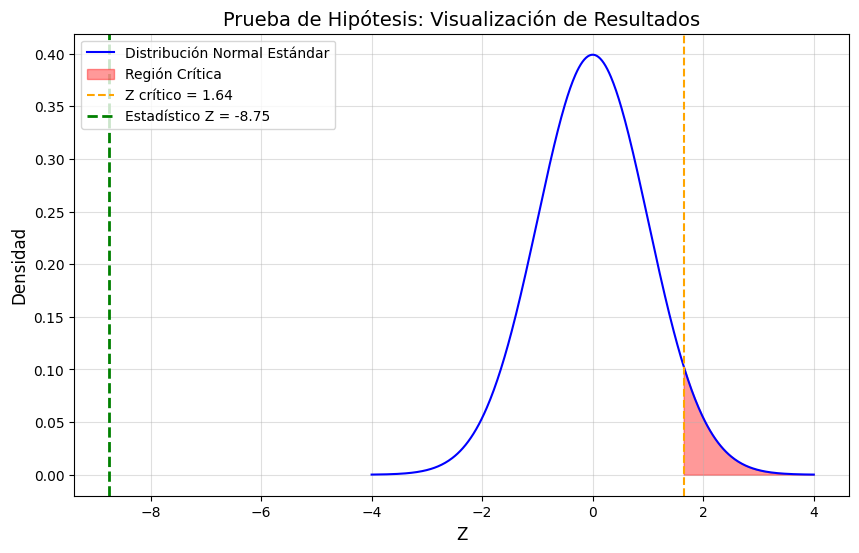

In [26]:
# Datos
ipspanel_counts = laptop_data['IPSpanel'].value_counts()
n = ipspanel_counts.sum()  # Tama√±o de la muestra
successes = ipspanel_counts['Yes']  # Laptops con IPSpanel
p_hat = successes / n  # Proporci√≥n observada
p_0 = 0.40  # Proporci√≥n hist√≥rica

# Estad√≠stico Z
z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Valor cr√≠tico y p-valor
z_critical = stats.norm.ppf(1 - 0.05)  # Cola superior
p_value = 1 - stats.norm.cdf(z_stat)

# Resultados
print(f"Tama√±o de la muestra (n): {n}")
print(f"Proporci√≥n observada (pÃÇ): {p_hat:.4f}")
print(f"Estad√≠stico Z: {z_stat:.4f}")
print(f"Valor cr√≠tico Z: {z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisi√≥n
if z_stat > z_critical:
    print("Rechazamos la hip√≥tesis nula (H0). La proporci√≥n de IPSpanel es significativamente mayor al 40%.")
else:
    print("No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que la proporci√≥n es mayor al 40%.")

plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='right-tailed')

#### Prueba de hip√≥tesis 3

Queremos determinar si el porcentaje de laptops con RetinaDisplay es significativamente diferente del 50%.

**Planteamiento de la hip√≥tesis**

- **Hip√≥tesis nula ($H_0$):** La proporci√≥n de laptops con RetinaDisplay es del 50%.  
  $H_0: p = 0.50$

- **Hip√≥tesis alternativa ($H_a$):** La proporci√≥n de laptops con RetinaDisplay es diferente del 50%.  
  $H_a: p \neq 0.50$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Regi√≥n cr√≠tica**

- Como esta es una prueba bilateral, rechazaremos $H_0$ si:

$$
|Z| > Z_{\alpha / 2}
$$


Tama√±o de la muestra (n): 1275
Proporci√≥n observada (pÃÇ): 0.0133
Estad√≠stico Z: -34.7550
Valor cr√≠tico Z: ¬±1.9600
Valor p: 0.0000
Rechazamos la hip√≥tesis nula (H0). La proporci√≥n de RetinaDisplay es significativamente diferente del 50%.


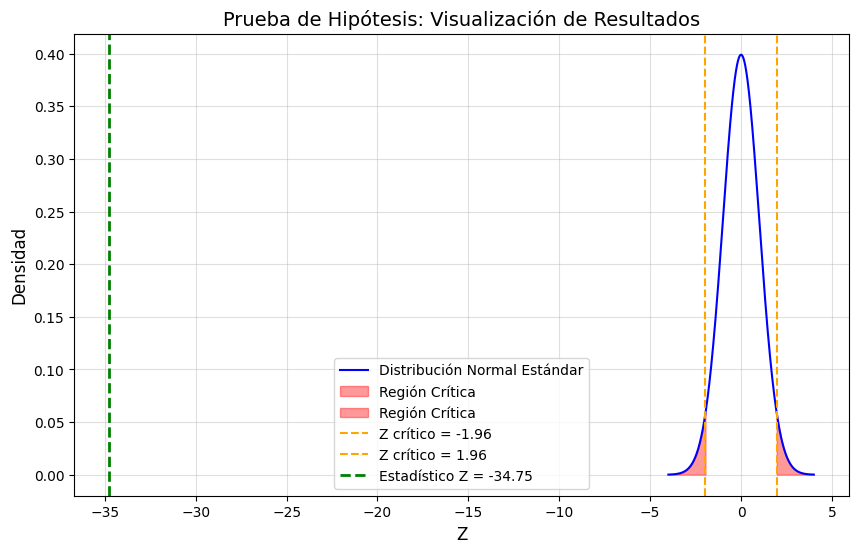

In [27]:
# Datos
retina_counts = laptop_data['RetinaDisplay'].value_counts()
n = retina_counts.sum()  # Tama√±o de la muestra
successes = retina_counts['Yes']  # Laptops con RetinaDisplay
p_hat = successes / n  # Proporci√≥n observada
p_0 = 0.50  # Proporci√≥n hist√≥rica

# Estad√≠stico Z
z_stat = (p_hat - p_0) / np.sqrt((p_0 * (1 - p_0)) / n)

# Valor cr√≠tico y p-valor
z_critical = stats.norm.ppf(1 - 0.05 / 2)  # Dos colas
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Resultados
print(f"Tama√±o de la muestra (n): {n}")
print(f"Proporci√≥n observada (pÃÇ): {p_hat:.4f}")
print(f"Estad√≠stico Z: {z_stat:.4f}")
print(f"Valor cr√≠tico Z: ¬±{z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisi√≥n
if abs(z_stat) > z_critical:
    print("Rechazamos la hip√≥tesis nula (H0). La proporci√≥n de RetinaDisplay es significativamente diferente del 50%.")
else:
    print("No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que la proporci√≥n es diferente del 50%.")

plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='two-tailed')

#### Prueba de hip√≥tesis 4

Queremos comparar si la proporci√≥n de laptops con Touchscreen ($p_1$) es significativamente diferente de la proporci√≥n de laptops con RetinaDisplay ($p_2$).

**Planteamiento de hip√≥tesis**

- **Hip√≥tesis nula ($H_0$):** No hay diferencia en las proporciones de las dos poblaciones.  
  $H_0: p_1 - p_2 = 0$

- **Hip√≥tesis alternativa ($H_a$):** Existe una diferencia significativa entre las proporciones.  
  $H_a: p_1 - p_2 \neq 0$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Estad√≠stico de prueba**

- El estad√≠stico $Z$ para la diferencia de proporciones se calcula como:

$$
Z = \frac{(\hat{p}_1 - \hat{p}_2)}{\sqrt{\hat{p}(1 - \hat{p}) \left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$

donde:

- $\hat{p}_1$ y $\hat{p}_2$ son las proporciones observadas de las dos poblaciones.
- $\hat{p}$ es la proporci√≥n combinada, calculada como:

$$
\hat{p} = \frac{x_1 + x_2}{n_1 + n_2}
$$

- $n_1$ y $n_2$ son los tama√±os de las dos poblaciones.

**Regi√≥n cr√≠tica**

- Como esta es una prueba bilateral, rechazaremos $H_0$ si:

$$
|Z| > Z_{\alpha / 2}
$$


Tama√±o de la muestra 1 (n1): 1275
Tama√±o de la muestra 2 (n2): 1275
Proporci√≥n observada 1 (pÃÇ1): 0.1475
Proporci√≥n observada 2 (pÃÇ2): 0.0133
Estad√≠stico Z: 12.4543
Valor cr√≠tico Z: ¬±1.9600
Valor p: 0.0000
Rechazamos la hip√≥tesis nula (H0). Las proporciones son significativamente diferentes.


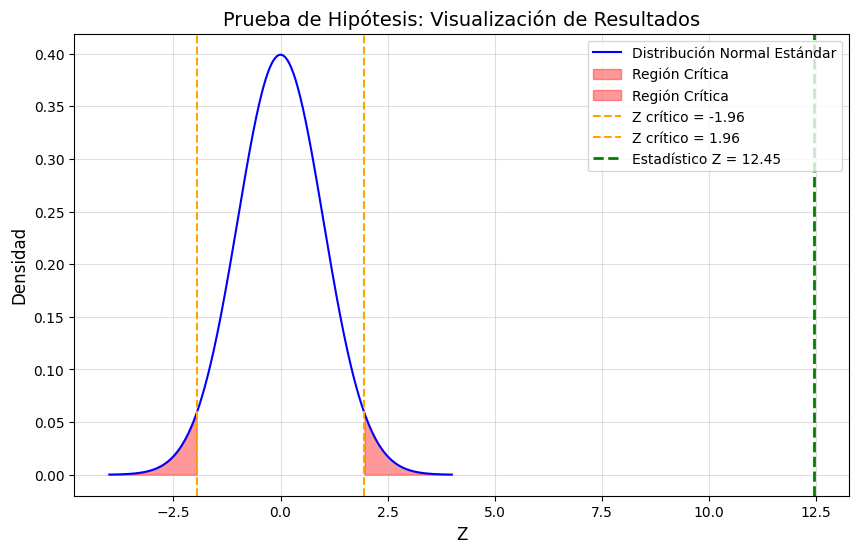

In [28]:
# Datos
touchscreen_counts = laptop_data['Touchscreen'].value_counts()
retina_counts = laptop_data['RetinaDisplay'].value_counts()

n1 = touchscreen_counts.sum()  # Tama√±o de la muestra 1
x1 = touchscreen_counts['Yes']  # Laptops con Touchscreen

n2 = retina_counts.sum()  # Tama√±o de la muestra 2
x2 = retina_counts['Yes']  # Laptops con RetinaDisplay

# Proporciones observadas
p1_hat = x1 / n1
p2_hat = x2 / n2

# Proporci√≥n combinada
p_combined = (x1 + x2) / (n1 + n2)

# Estad√≠stico Z
z_stat = (p1_hat - p2_hat) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))

# Valor cr√≠tico y p-valor
z_critical = stats.norm.ppf(1 - 0.05 / 2)  # Dos colas
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# Resultados
print(f"Tama√±o de la muestra 1 (n1): {n1}")
print(f"Tama√±o de la muestra 2 (n2): {n2}")
print(f"Proporci√≥n observada 1 (pÃÇ1): {p1_hat:.4f}")
print(f"Proporci√≥n observada 2 (pÃÇ2): {p2_hat:.4f}")
print(f"Estad√≠stico Z: {z_stat:.4f}")
print(f"Valor cr√≠tico Z: ¬±{z_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisi√≥n
if abs(z_stat) > z_critical:
    print("Rechazamos la hip√≥tesis nula (H0). Las proporciones son significativamente diferentes.")
else:
    print("No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que las proporciones son diferentes.")

plot_hypothesis_test(z_stat=z_stat, z_critical=z_critical, p_value=p_value, test_type='two-tailed')

#### Prueba de hip√≥tesis 5


**Planteamiento del problema**

Queremos determinar si el peso promedio de las laptops con Touchscreen ($\mu_1$) es mayor que el de las laptops sin Touchscreen ($\mu_2$).

**Planteamiento de hip√≥tesis**

- **Hip√≥tesis nula ($H_0$):** El peso promedio de las laptops con Touchscreen es menor o igual al de las laptops sin Touchscreen.  
  $H_0: \mu_1 - \mu_2 \leq 0$

- **Hip√≥tesis alternativa ($H_a$):** El peso promedio de las laptops con Touchscreen es mayor.  
  $H_a: \mu_1 - \mu_2 > 0$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Estad√≠stico de prueba**

- El estad√≠stico $t$ para la diferencia de medias se calcula como:

$$
t = \frac{(\bar{x}_1 - \bar{x}_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

donde:

- $\bar{x}_1$ y $\bar{x}_2$: Medias muestrales de las dos poblaciones.
- $s_1^2$ y $s_2^2$: Varianzas muestrales de las dos poblaciones.
- $n_1$ y $n_2$: Tama√±os de las dos poblaciones.


Tama√±o de la muestra 1 (n1): 188
Tama√±o de la muestra 2 (n2): 1087
Media muestral 1 (xÃÑ1): 1.5677
Media muestral 2 (xÃÑ2): 2.1223
Estad√≠stico t: -12.9100
Valor cr√≠tico t: 1.6530
Valor p: 1.0000
No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que el peso promedio es mayor.


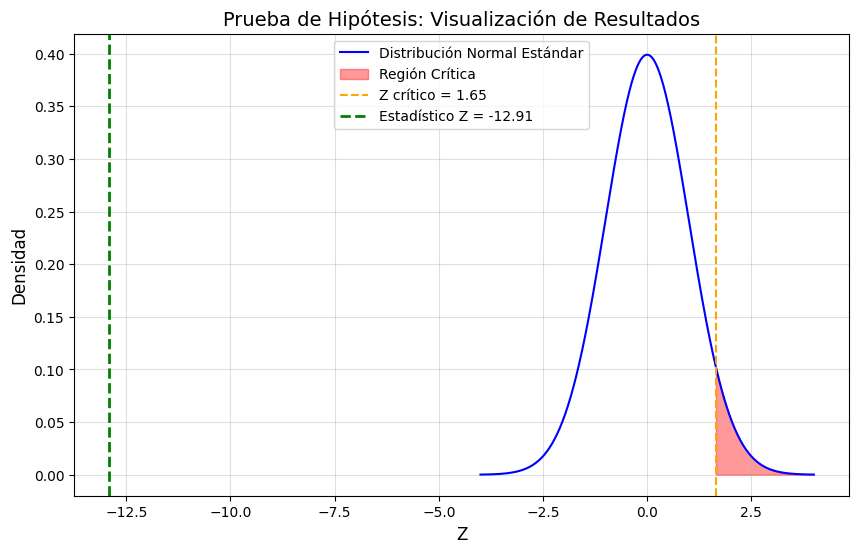

In [29]:
# Datos
touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'Yes']['Weight']
non_touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'No']['Weight']

n1 = len(touchscreen_weights)
n2 = len(non_touchscreen_weights)

mean1 = touchscreen_weights.mean()
mean2 = non_touchscreen_weights.mean()

std1 = touchscreen_weights.std()
std2 = non_touchscreen_weights.std()

# Estad√≠stico t
t_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Valor cr√≠tico y p-valor
df = min(n1 - 1, n2 - 1)  # Grados de libertad aproximados
t_critical = stats.t.ppf(1 - 0.05, df)
p_value = 1 - stats.t.cdf(t_stat, df)

# Resultados
print(f"Tama√±o de la muestra 1 (n1): {n1}")
print(f"Tama√±o de la muestra 2 (n2): {n2}")
print(f"Media muestral 1 (xÃÑ1): {mean1:.4f}")
print(f"Media muestral 2 (xÃÑ2): {mean2:.4f}")
print(f"Estad√≠stico t: {t_stat:.4f}")
print(f"Valor cr√≠tico t: {t_critical:.4f}")
print(f"Valor p: {p_value:.4f}")

# Decisi√≥n
if t_stat > t_critical:
    print("Rechazamos la hip√≥tesis nula (H0). El peso promedio de laptops con Touchscreen es significativamente mayor.")
else:
    print("No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que el peso promedio es mayor.")

plot_hypothesis_test(z_stat=t_stat, z_critical=t_critical, p_value=p_value, test_type='right-tailed')

#### Prueba de hip√≥tesis 6

Queremos determinar si las varianzas del peso de las laptops con Touchscreen ($\sigma_1^2$) y las sin Touchscreen ($\sigma_2^2$) son significativamente diferentes.

**Planteamiento de hip√≥tesis**

- **Hip√≥tesis nula ($H_0$):** Las varianzas son iguales.  
  $H_0: \sigma_1^2 = \sigma_2^2$

- **Hip√≥tesis alternativa ($H_a$):** Las varianzas son diferentes.  
  $H_a: \sigma_1^2 \neq \sigma_2^2$

**Nivel de significancia ($\alpha$)**

- Fijamos un nivel de significancia de $\alpha = 0.05$ (5%).

**Estad√≠stico de prueba**

- Utilizamos la **prueba F** para comparar varianzas. El estad√≠stico de prueba se calcula como:

$$
F = \frac{s_1^2}{s_2^2}
$$

donde:

- $s_1^2$ y $s_2^2$: Varianzas muestrales de las dos poblaciones.  
- Se asume que $s_1^2 \geq s_2^2$ para calcular el estad√≠stico correctamente.

**Regi√≥n cr√≠tica**

- La regi√≥n cr√≠tica se define con los valores cr√≠ticos $F_{1-\alpha/2}$ y $F_{\alpha/2}$, obtenidos de la **distribuci√≥n F** con grados de libertad:

- $df_1 = n_1 - 1$  
- $df_2 = n_2 - 1$

Rechazamos $H_0$ si:

$$
F > F_{1-\alpha/2} \quad \text{o} \quad F < F_{\alpha/2}
$$


Tama√±o de la muestra 1 (n1): 188
Tama√±o de la muestra 2 (n2): 1087
Varianza muestral 1 (s1^2): 0.2721
Varianza muestral 2 (s2^2): 0.4331
Estad√≠stico F: 1.5916
Valores cr√≠ticos F: [0.7956, 1.2353]
Valor p: 2.0000
Rechazamos la hip√≥tesis nula (H0). Las varianzas son significativamente diferentes.


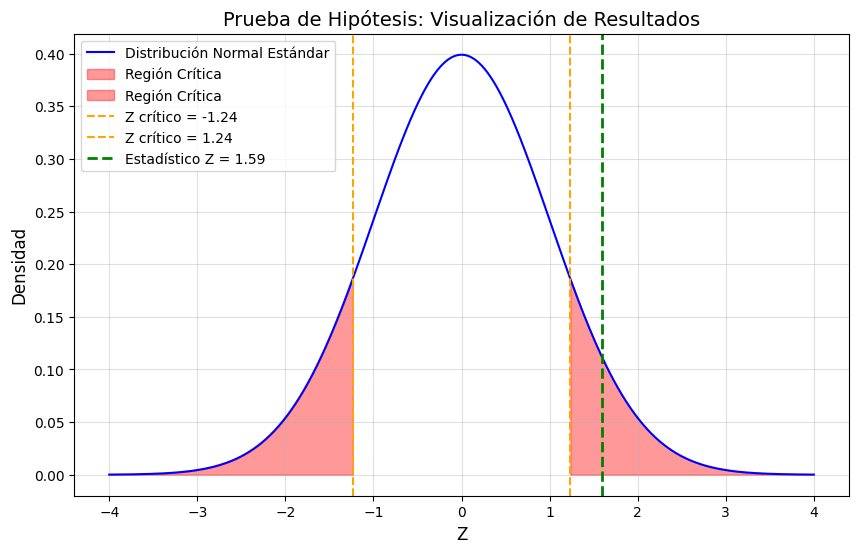

In [30]:
from scipy.stats import f

# Datos
touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'Yes']['Weight']
non_touchscreen_weights = laptop_data[laptop_data['Touchscreen'] == 'No']['Weight']

n1 = len(touchscreen_weights)
n2 = len(non_touchscreen_weights)

var1 = touchscreen_weights.var(ddof=1)  # Varianza muestral 1
var2 = non_touchscreen_weights.var(ddof=1)  # Varianza muestral 2

# Estad√≠stico F
F_stat = var1 / var2 if var1 >= var2 else var2 / var1

# Grados de libertad
df1 = n1 - 1
df2 = n2 - 1

# Valores cr√≠ticos
alpha = 0.05
F_critical_upper = f.ppf(1 - alpha / 2, df1, df2)
F_critical_lower = f.ppf(alpha / 2, df1, df2)

# p-valor
if var1 >= var2:
    p_value = 2 * (1 - f.cdf(F_stat, df1, df2))
else:
    p_value = 2 * f.cdf(F_stat, df1, df2)

# Resultados
print(f"Tama√±o de la muestra 1 (n1): {n1}")
print(f"Tama√±o de la muestra 2 (n2): {n2}")
print(f"Varianza muestral 1 (s1^2): {var1:.4f}")
print(f"Varianza muestral 2 (s2^2): {var2:.4f}")
print(f"Estad√≠stico F: {F_stat:.4f}")
print(f"Valores cr√≠ticos F: [{F_critical_lower:.4f}, {F_critical_upper:.4f}]")
print(f"Valor p: {p_value:.4f}")

# Decisi√≥n
if F_stat > F_critical_upper or F_stat < F_critical_lower:
    print("Rechazamos la hip√≥tesis nula (H0). Las varianzas son significativamente diferentes.")
else:
    print("No rechazamos la hip√≥tesis nula (H0). No hay evidencia suficiente para concluir que las varianzas son diferentes.")

plot_hypothesis_test(z_stat=F_stat, z_critical=F_critical_upper, p_value=p_value, test_type='two-tailed')

In [31]:
# Crear una tabla de contingencia entre 'Company' y 'TypeName'
contingency_table = pd.crosstab(laptop_data['Company'], laptop_data['TypeName'])

# Mostrar la tabla de contingencia
contingency_table

TypeName   2 in 1 Convertible  Gaming  Netbook  Notebook  Ultrabook  \
Company                                                               
Acer                        8       8        5        76          4   
Apple                       0       0        0         0         21   
Asus                       13      54        4        63         18   
Chuwi                       0       0        0         3          0   
Dell                       30      40        2       159         49   
Fujitsu                     0       0        0         3          0   
Google                      0       0        0         0          3   
HP                         19      12        7       180         36   
Huawei                      0       0        0         0          2   
LG                          0       0        0         0          3   
Lenovo                     44      32        4       174         31   
MSI                         0      54        0         0          0   
Mediacom                    1       0        0         6          0   
Microsoft                   0       0        0         0          6   
Razer                       0       5        0         0          2   
Samsung                     2       0        1         1          5   
Toshiba                     0       0        0        36         12   
Vero                        0       0        0         4          0   
Xiaomi                      0       0        0         2          2   

TypeName   Workstation  
Company                 
Acer                 0  
Apple                0  
Asus                 0  
Chuwi                0  
Dell                11  
Fujitsu              0  
Google               0  
HP                  14  
Huawei               0  
LG                   0  
Lenovo               4  
MSI                  0  
Mediacom             0  
Microsoft            0  
Razer                0  
Samsung              0  
Toshiba              0  
Vero                 0  
Xiaomi               0

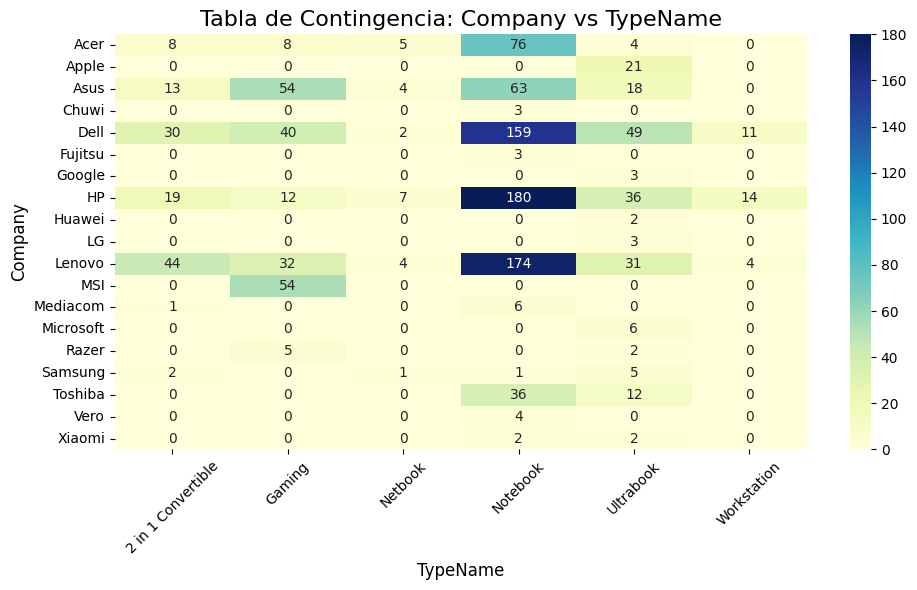

In [32]:
# Crear un mapa de calor para la tabla de contingencia
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# Personalizar el gr√°fico
plt.title("Tabla de Contingencia: Company vs TypeName", fontsize=16)
plt.xlabel("TypeName", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el gr√°fico
plt.show()


#### 3.3 An√°lisis de la tabla de contingencia: `Company` vs `TypeName`

1. **Dominancia de Notebook:**
   - La categor√≠a `Notebook` es la m√°s representada en la mayor√≠a de los fabricantes, especialmente en empresas como:
     - **HP**: 180 productos.
     - **Lenovo**: 174 productos.
     - **Dell**: 159 productos.
     - **Acer**: 76 productos.
   - Esto refleja que los fabricantes se enfocan principalmente en esta l√≠nea de productos, probablemente debido a su alta demanda.

2. **Especializaci√≥n en Gaming:**
   - **MSI** es claramente un fabricante especializado en laptops gaming, con 54 productos en esta categor√≠a y ninguna representaci√≥n en otras l√≠neas.
   - **Asus** y **Dell** tambi√©n tienen una fuerte presencia en esta categor√≠a con 54 y 40 productos, respectivamente.

3. **Ultrabooks:**
   - **Apple** lidera en la categor√≠a de `Ultrabook` con 21 productos. Esto coincide con la estrategia de Apple de centrarse en laptops premium como los MacBook.
   - **Dell** y **HP** tambi√©n tienen una presencia considerable con 49 y 36 productos, respectivamente.

4. **2-in-1 Convertible:**
   - **Lenovo** destaca con 44 productos en esta categor√≠a, seguido por **Dell** con 30 y **HP** con 19.
   - Este segmento parece estar dominado por fabricantes que buscan innovar con laptops vers√°tiles.

5. **Netbooks:**
   - Esta categor√≠a tiene una representaci√≥n muy baja en general, con solo algunos productos de marcas como **Acer** (5), **Asus** (4), y **HP** (7). Esto sugiere que el mercado de netbooks est√° en declive.

6. **Workstations:**
   - Las `Workstations` tienen una representaci√≥n limitada, siendo **HP** y **Dell** los principales fabricantes en este segmento con 14 y 11 productos, respectivamente.
   - Esto refleja que las estaciones de trabajo son una categor√≠a de nicho enfocada en usuarios profesionales.

#### Conclusiones:
1. **L√≠deres por categor√≠a:**
   - **Notebook**: HP, Lenovo, Dell.
   - **Gaming**: MSI, Asus.
   - **Ultrabook**: Apple, Dell.
   - **2-in-1 Convertible**: Lenovo, Dell.

2. **Diversificaci√≥n:**
   - **HP**, **Dell**, y **Lenovo** tienen una amplia diversificaci√≥n en todas las categor√≠as, lo que podr√≠a indicar una estrategia de mercado equilibrada para atender a diferentes segmentos.

3. **Enfoque en productos premium:**
   - Marcas como **Apple**, **Microsoft**, y **Razer** tienen una oferta limitada, centrada en categor√≠as premium como `Ultrabook` y `Gaming`.

4. **Mercado de nicho:**
   - Las categor√≠as como `Netbook` y `Workstation` tienen poca representaci√≥n, lo que podr√≠a indicar menor demanda o un enfoque en mercados especializados.


#### Test de Homogeneidad e Independencia para la Tabla de Contingencia

**1. Test de Homogeneidad**: 
El test de homogeneidad eval√∫a si las distribuciones de las categor√≠as (en este caso, los tipos de laptops) son similares entre diferentes fabricantes.

Hip√≥tesis:
- **H‚ÇÄ (Hip√≥tesis nula):** La distribuci√≥n de los tipos de laptops es la misma entre los fabricantes.
- **H‚ÇÅ (Hip√≥tesis alternativa):** La distribuci√≥n de los tipos de laptops difiere entre los fabricantes.

**2. Test de Independencia**: 
El test de independencia eval√∫a si hay una relaci√≥n entre las dos variables categ√≥ricas (`Company` y `TypeName`) o si son independientes.

Hip√≥tesis:
- **H‚ÇÄ (Hip√≥tesis nula):** Las variables `Company` y `TypeName` son independientes.
- **H‚ÇÅ (Hip√≥tesis alternativa):** Las variables `Company` y `TypeName` est√°n relacionadas.


In [33]:
# Test de Chi-Cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")

Chi2 Statistic: 698.3420972667907
p-value: 7.661508096764154e-95
Degrees of Freedom: 90


#### An√°lisis de los resultados de los test de homogeneidad e independencia

Este test verifica si la distribuci√≥n de los tipos de laptops es homog√©nea entre los fabricantes.

**1. Test de Homogeneidad:**
- **p-value muy bajo** (
7.66 √ó 10‚Åª‚Åπ‚Åµ
):
  - Con un nivel de significancia com√∫n (
ùõº = 0.05
), rechazamos la hip√≥tesis nula (
H‚ÇÄ
).
  - Esto implica que las distribuciones de los tipos de laptops difieren significativamente entre los fabricantes.


**2. Test de Independencia:**
- **p-value muy bajo** (
7.66 √ó 10‚Åª‚Åπ‚Åµ
):
  - Rechazamos la hip√≥tesis nula (
H‚ÇÄ
) de independencia.
  - Esto sugiere que existe una relaci√≥n significativa entre el fabricante (`Company`) y el tipo de laptop (`TypeName`).

**Conclusiones:**
1. **Distribuciones no homog√©neas:**
   - Las distribuciones de los tipos de laptops no son homog√©neas entre los fabricantes. Esto indica que ciertos fabricantes tienden a especializarse en determinados tipos de laptops. Por ejemplo:
     - **Apple** produce √∫nicamente `Ultrabooks`.
     - **MSI** se enfoca en laptops `Gaming`.
     - **Lenovo**, **Dell**, y **HP** tienen una gama m√°s diversificada de tipos.

2. **Relaci√≥n significativa:**
   - Existe una relaci√≥n significativa entre el fabricante y el tipo de laptop. 
   - Esto refleja que las empresas tienen estrategias de mercado y especializaciones claras en t√©rminos de los productos que ofrecen.


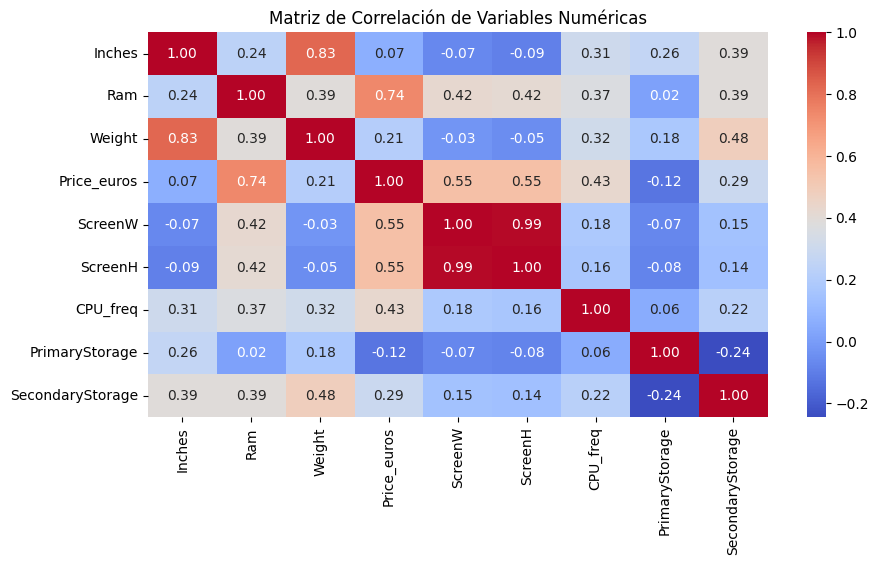

In [34]:
# Seleccionar solo columnas num√©ricas
numerical_columns = laptop_data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlaci√≥n
correlation_matrix = numerical_columns.corr()

# Visualizar la matriz de correlaci√≥n con un heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Matriz de Correlaci√≥n de Variables Num√©ricas")
plt.show()

#### An√°lisis de la Matriz de Correlaci√≥n

A partir de la matriz de correlaci√≥n presentada en el mapa de calor, se pueden extraer las siguientes conclusiones sobre la correlaci√≥n lineal entre las variables num√©ricas:

##### 1. Correlaciones fuertes:
- **ScreenW y ScreenH (r ‚âà 0.99):** 
  - Existe una correlaci√≥n positiva extremadamente fuerte entre el ancho (`ScreenW`) y el alto (`ScreenH`) de la pantalla. Esto es intuitivo, ya que ambas dimensiones est√°n relacionadas por la proporci√≥n de la pantalla.
- **Inches y Weight (r ‚âà 0.83):** 
  - Existe una correlaci√≥n positiva fuerte entre el tama√±o de la pantalla (`Inches`) y el peso (`Weight`). Es l√≥gico suponer que laptops con pantallas m√°s grandes suelen ser m√°s pesadas debido a componentes m√°s grandes.

##### 2. Correlaciones moderadas:
- **Price_euros y Ram (r ‚âà 0.74):**
  - Hay una correlaci√≥n positiva moderada-alta entre el precio y la cantidad de RAM. Esto indica que laptops con mayor RAM suelen ser m√°s costosas.
- **Price_euros y ScreenW/ScreenH (r ‚âà 0.55):**
  - Existe una correlaci√≥n positiva moderada entre el precio y las dimensiones de la pantalla. Esto sugiere que laptops con pantallas m√°s grandes pueden ser m√°s caras.
- **Price_euros y CPU_freq (r ‚âà 0.43):**
  - Hay una correlaci√≥n positiva moderada entre el precio y la frecuencia del procesador, lo que indica que laptops con procesadores m√°s r√°pidos tienden a ser m√°s caras.

##### 3. Correlaciones bajas o insignificantes:
- **Price_euros y Inches (r ‚âà 0.07):**
  - Existe una correlaci√≥n muy baja entre el tama√±o de la pantalla en pulgadas y el precio, lo cual indica que el tama√±o por s√≠ solo no es un factor determinante del costo.
- **PrimaryStorage y Price_euros (r ‚âà -0.12):**
  - La correlaci√≥n entre el almacenamiento primario y el precio es baja y negativa, sugiriendo que el almacenamiento no es un fuerte determinante del precio en este conjunto de datos.

##### 4. Relaciones espec√≠ficas de inter√©s:
- **SecondaryStorage y Weight (r ‚âà 0.48):**
  - Existe una correlaci√≥n positiva moderada entre el almacenamiento secundario y el peso, lo que podr√≠a indicar que laptops con m√°s almacenamiento secundario suelen ser m√°s pesadas.
- **Ram y ScreenW/ScreenH (r ‚âà 0.42):**
  - Hay una correlaci√≥n moderada entre la cantidad de RAM y las dimensiones de la pantalla. Esto sugiere que laptops con pantallas m√°s grandes tienden a tener mayor capacidad de RAM.

#### Interpretaciones Generales:
**Precio (`Price_euros`) como variable clave:**
- El precio tiene una correlaci√≥n m√°s fuerte con caracter√≠sticas de rendimiento como `Ram` y `CPU_freq`, mientras que tiene correlaciones m√°s d√©biles con caracter√≠sticas f√≠sicas como `Inches` o `Weight`.
- El precio tambi√©n est√° moderadamente relacionado con las dimensiones de la pantalla, lo que indica que las pantallas m√°s grandes suelen estar asociadas a laptops de gama alta.

**Caracter√≠sticas f√≠sicas:**
- El peso est√° fuertemente correlacionado con el tama√±o de la pantalla, lo que es l√≥gico porque laptops m√°s grandes suelen ser m√°s pesadas.
- Las dimensiones de la pantalla est√°n altamente correlacionadas entre s√≠.

**Rendimiento:**
- La `Ram` y la frecuencia del `CPU` tienen correlaciones moderadas con el precio, destacando su importancia en el costo final de una laptop.


### 3.4 Analisis de la linealidad de las variables

Bas√°ndonos en las conclusiones del an√°lisis de la matriz de correlaci√≥n, las variables m√°s prometedoras e interesantes para analizar en el pair plot son aquellas que presentan correlaciones fuertes o moderadas y tienen una relaci√≥n significativa con el precio o las caracter√≠sticas f√≠sicas y de rendimiento. Estas variables son:

1. `Price_euros`: Variable clave para evaluar c√≥mo las diferentes caracter√≠sticas afectan el precio.
2. `Ram`: Tiene una correlaci√≥n moderada-alta con el precio.
3. `CPU_freq`: Relacionada moderadamente con el precio.
4. `Weight`: Fuerte relaci√≥n con caracter√≠sticas f√≠sicas como el tama√±o de la pantalla.
5. `Inches`: Aunque su correlaci√≥n con el precio es baja, tiene una fuerte correlaci√≥n con el peso.

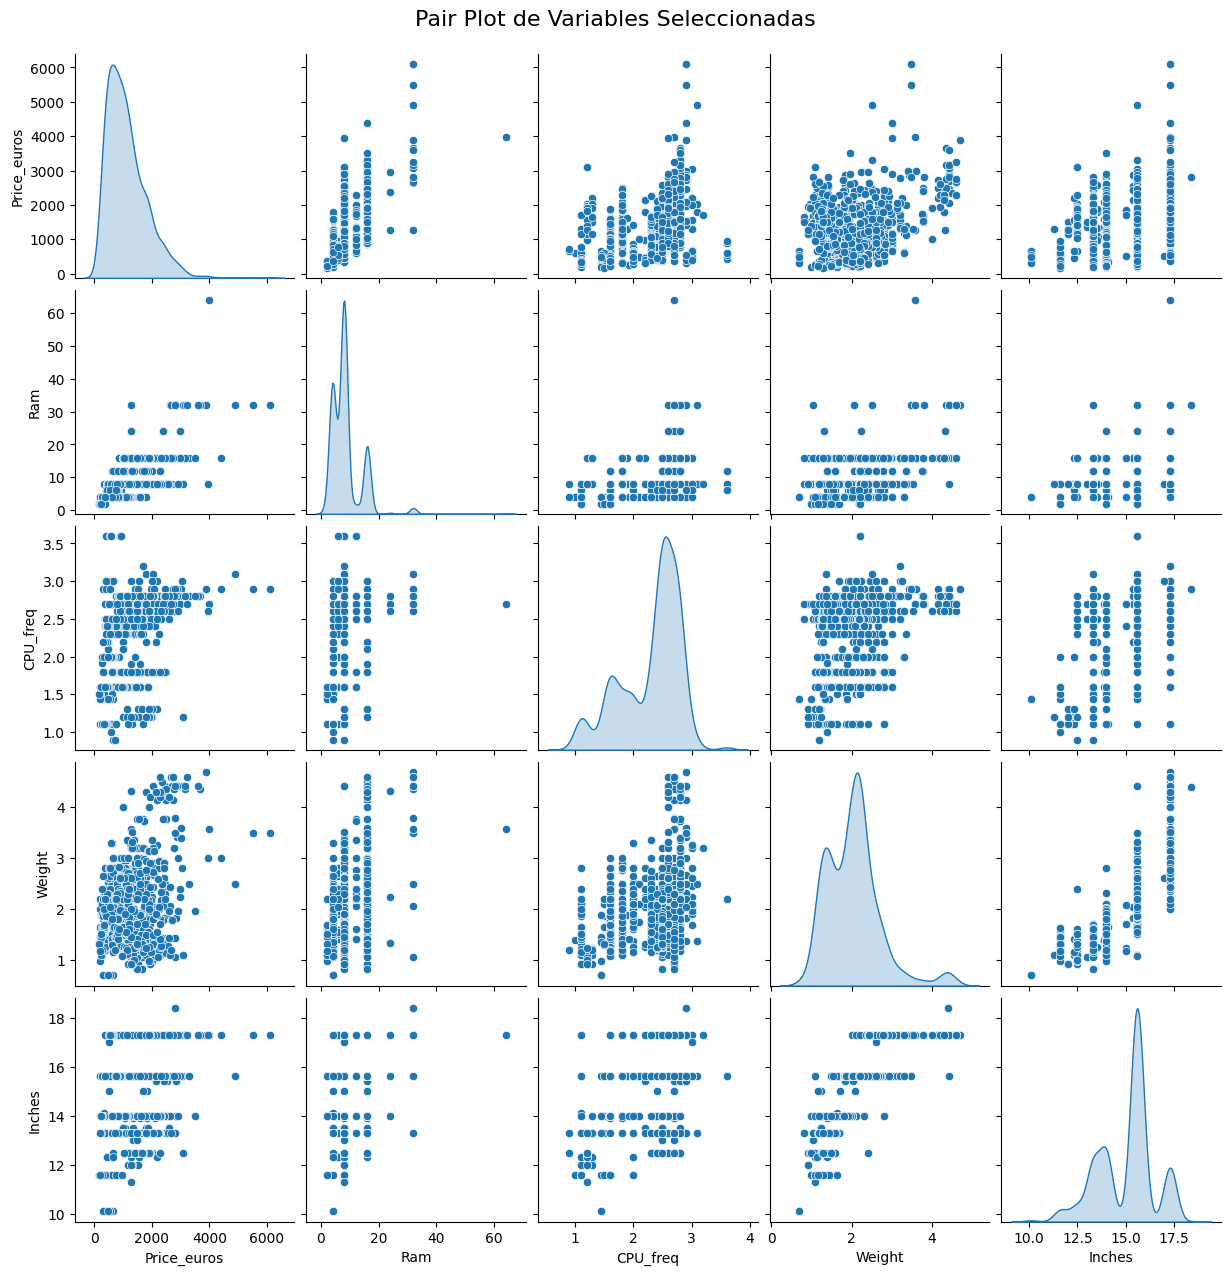

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables m√°s interesantes
selected_columns = ['Price_euros', 'Ram', 'CPU_freq', 'Weight', 'Inches']

# Crear el pair plot sin el argumento `palette`
pair_plot = sns.pairplot(
    laptop_data[selected_columns], 
    diag_kind="kde", 
    corner=False
)
pair_plot.figure.suptitle("Pair Plot de Variables Seleccionadas", y=1.02, fontsize=16)
plt.show()


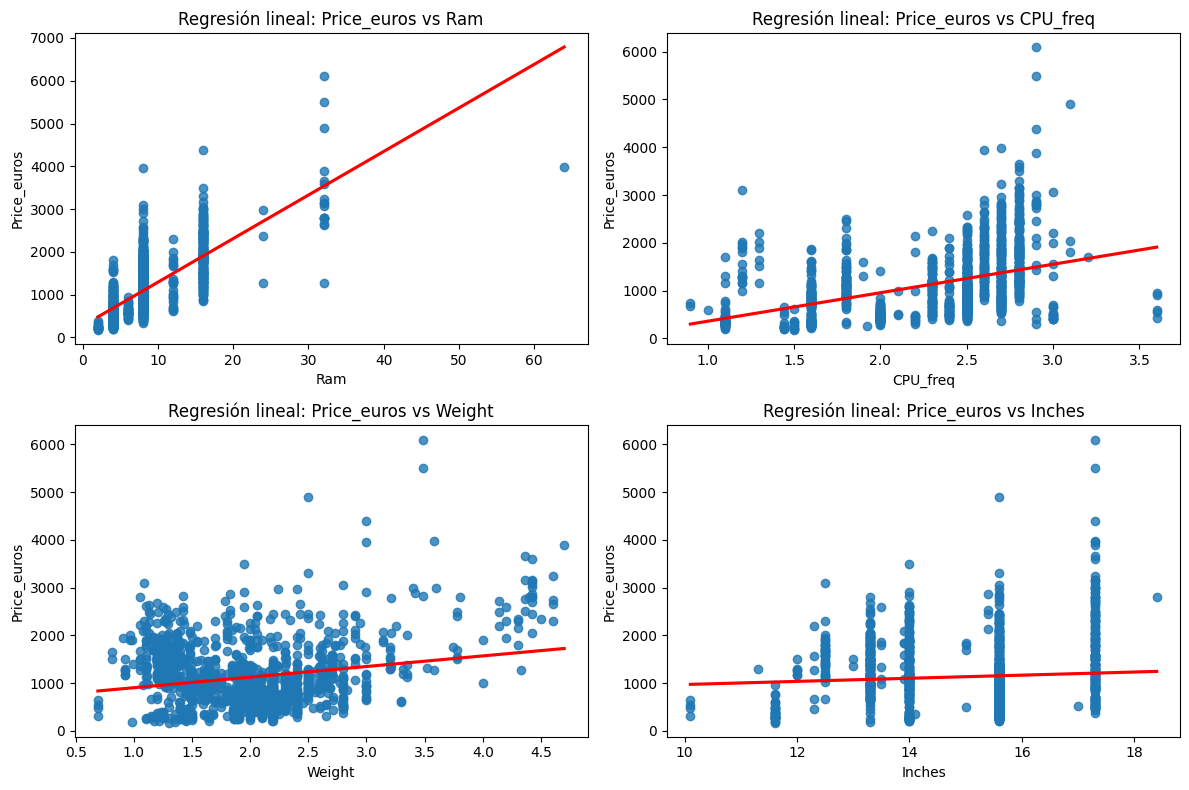

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables
variables = ['Ram', 'CPU_freq', 'Weight', 'Inches']

# Crear subplots: N√∫mero de filas y columnas seg√∫n la cantidad de variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Recorrer las variables y asignar cada una a un subplot
for i, var in enumerate(variables):
    row = i // 2  # Fila del subplot
    col = i % 2   # Columna del subplot
    
    sns.regplot(
        data=laptop_data, x=var, y='Price_euros', 
        ci=None, line_kws={'color': 'red'}, ax=axes[row, col]
    )
    axes[row, col].set_title(f'Regresi√≥n lineal: Price_euros vs {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price_euros')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


A partir de los gr√°ficos de regresi√≥n, se pueden sacar las siguientes conclusiones preliminares sobre la relaci√≥n entre las variables independientes y el precio (`Price_euros`):

1. **RAM (`Ram`)**:
   - Existe una **fuerte relaci√≥n positiva** entre la cantidad de RAM y el precio. A medida que aumenta la RAM, el precio tambi√©n tiende a incrementarse significativamente.
   - Esto indica que la RAM es un factor importante que influye en el costo de los laptops.

2. **Frecuencia del CPU (`CPU_freq`)**:
   - La relaci√≥n es **positiva pero d√©bil**, lo que sugiere que una mayor frecuencia de CPU tiende a asociarse con precios m√°s altos, aunque no de manera tan pronunciada como la RAM.
   - Esto podr√≠a deberse a que otros factores del CPU (como el n√∫mero de n√∫cleos o la arquitectura) tienen m√°s peso en el precio que la frecuencia por s√≠ sola.

3. **Peso (`Weight`)**:
   - Existe una **relaci√≥n positiva muy d√©bil** entre el peso del laptop y su precio.
   - Esto podr√≠a deberse a que el peso no es un factor determinante para el costo, o que los laptops m√°s pesados pertenecen a gamas m√°s econ√≥micas o intermedias.

4. **Tama√±o de la pantalla (`Inches`)**:
   - La relaci√≥n es **muy d√©bil y pr√°cticamente nula**. El tama√±o de la pantalla no parece influir significativamente en el precio de los laptops.
   - Esto podr√≠a indicar que los laptops con pantallas m√°s grandes no necesariamente son m√°s caros, ya que el precio puede depender m√°s de otros factores internos (hardware).


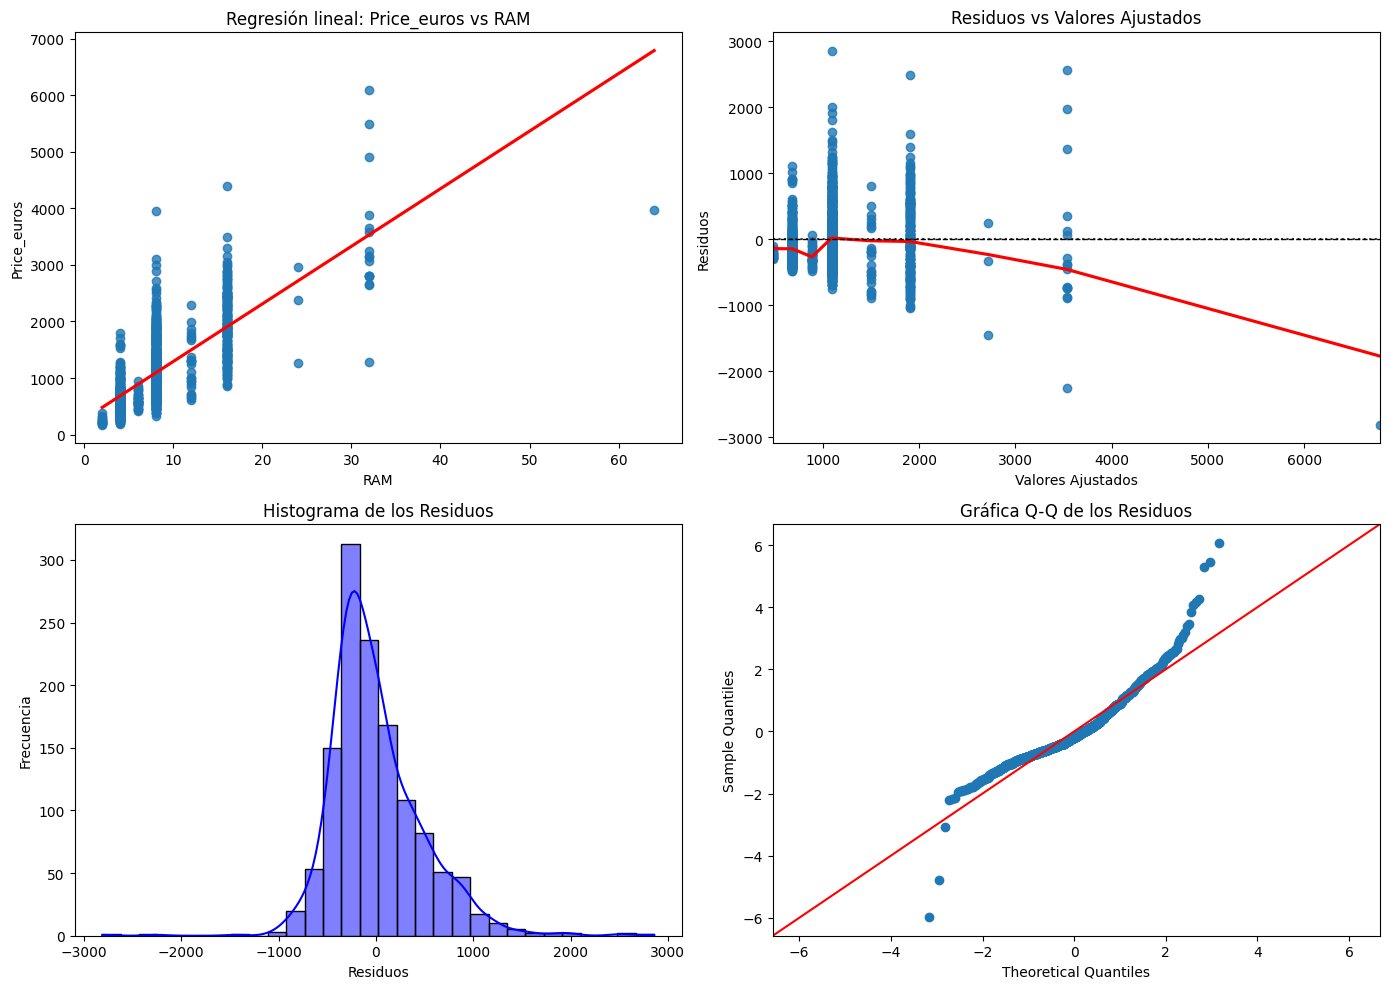

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Modelo de regresi√≥n lineal
x = laptop_data[['Ram']]
X = sm.add_constant(x)
y = laptop_data['Price_euros']
modelo = sm.OLS(y, X).fit()

# Valores ajustados y residuos
fitted_values = modelo.fittedvalues
residuals = modelo.resid

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#
sns.regplot(data=laptop_data, x=x, y=y, ci=None, line_kws={'color': 'red'}, ax=axes[0, 0])
axes[0, 0].set_title(f'Regresi√≥n lineal: Price_euros vs RAM')
axes[0, 0].set_xlabel('RAM')
axes[0, 0].set_ylabel('Price_euros')

# 1. Residuos vs Valores Ajustados (Linealidad y Homocedasticidad)
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red'}, ax=axes[0, 1])
axes[0, 1].axhline(0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_title('Residuos vs Valores Ajustados')
axes[0, 1].set_xlabel('Valores Ajustados')
axes[0, 1].set_ylabel('Residuos')

# 2. Histograma de los Residuos (Normalidad)
sns.histplot(residuals, kde=True, bins=30, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Histograma de los Residuos')
axes[1, 0].set_xlabel('Residuos')
axes[1, 0].set_ylabel('Frecuencia')

# 3. Gr√°fica Q-Q (Normalidad)
sm.qqplot(residuals, line='45', fit=True, ax=axes[1, 1])
axes[1, 1].set_title('Gr√°fica Q-Q de los Residuos')


# Ajustar dise√±o
plt.tight_layout()
plt.show()

Analizando las gr√°ficas generadas, podemos sacar las siguientes conclusiones sobre las suposiciones del modelo de regresi√≥n lineal:

1. **Residuos vs Valores Ajustados**
  - Parece haber un patr√≥n curvo en los residuos, lo que indica que la relaci√≥n entre `Price_euros` y `Ram` podr√≠a no ser estrictamente lineal.
  - La dispersi√≥n de los puntos no es uniforme (se estrecha hacia valores altos de `Price_euros`), lo que sugiere **heterocedasticidad** (varianza no constante en los residuos), es decir, la suposici√≥n de linealidad y homocedasticidad no se cumple completamente.

2. **Histograma de los Residuos**
  - El histograma tiene una forma aproximadamente sim√©trica, pero con ligeros indicios de colas m√°s pesadas (outliers).
  - Aunque hay desviaciones, la normalidad de los residuos parece ser aceptable para este modelo.

3. **Gr√°fica Q-Q**
  - Los puntos siguen la l√≠nea roja en la mayor√≠a del rango, pero se desv√≠an significativamente en las colas (valores extremos), es decir, la normalidad no es perfecta.
  - Esto confirma la presencia de **outliers** o una distribuci√≥n con colas m√°s pesadas.


**Analisis de los supuestos**

1. Para comprobar que los errores son independientes se utiliza un test de independencia sobre los residuos, el test Durbin-Watson

    - $H_0$: No existe correlaci√≥n entre los residuos.

    - $H_1$: Los residuos est√°n autocorrelacionados.

2. Para comprobar la Varianza del error aleatorio es constante se realiza un test de Breusch-Pagan para determinar la Homocedasticidad de los residuos. 

    - $H_0$: La homocedasticidad est√° presente.

    - $H_1$: La homocedasticidad no est√° presente (es decir, existe heterocedasticidad)

In [38]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan


# Independence (Durbin-Watson Test)
dw_test = durbin_watson(residuals)

print(f'Durbin-Watson Test: {dw_test}')

alpha = 0.5

if 2 - alpha <= dw_test <= 2 + alpha:
    print("Los residuos son independientes.")
elif dw_test > 2 + 0.5:
    print("Existe una autocorrelacion positiva.")
else:
    print("Existe una autocorrelacion negativa")
    
    
# Homoscedasticity (Breusch-Pagan test)
_, bp_pvalue, _, _ = het_breuschpagan(residuals, X)

print(f'Breusch-Pagan Test p-value: {bp_pvalue}')

if bp_pvalue < 0.05:
    print("Se rechaza la hipotesis nula y port tanto la homocedasticidad no esta presente.")
else:
    print("No hay sufienciente evidencia para rechazar la hipotesis nula y por tanto la homocedasticidad esta presente.")

Durbin-Watson Test: 2.026560223329475
Los residuos son independientes.
Breusch-Pagan Test p-value: 2.5515263271325886e-38
Se rechaza la hipotesis nula y port tanto la homocedasticidad no esta presente.


In [39]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variables seleccionadas para el an√°lisis
variables = ['Ram', 'CPU_freq', 'Weight', 'Inches']
X = laptop_data[variables]
y = laptop_data['Price_euros']

# A√±adir constante para el modelo
X = sm.add_constant(X)

# Modelo de regresi√≥n m√∫ltiple
modelo = sm.OLS(y, X).fit()

# Calcular VIF (Variance Inflation Factor)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Resumen del modelo
resumen_modelo = modelo.summary()
vif_data, resumen_modelo


(   Variable         VIF
 0     const  223.500548
 1       Ram    1.322381
 2  CPU_freq    1.225814
 3    Weight    3.594022
 4    Inches    3.290234,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            Price_euros   R-squared:                       0.603
 Model:                            OLS   Adj. R-squared:                  0.602
 Method:                 Least Squares   F-statistic:                     481.9
 Date:                Sun, 26 Jan 2025   Prob (F-statistic):          8.39e-253
 Time:                        15:52:28   Log-Likelihood:                -9574.0
 No. Observations:                1275   AIC:                         1.916e+04
 Df Residuals:                    1270   BIC:                         1.918e+04
 Df Model:                           4                                         
 Covariance Type:            nonrobust                                         

A partir de los resultados del an√°lisis de regresi√≥n m√∫ltiple, podemos extraer varias conclusiones importantes. 

**1. An√°lisis del modelo general:**
- `R-cuadrado (R¬≤):`
  El modelo tiene un R¬≤ de 0.603, lo que significa que el 60.3% de la variabilidad en el precio de las laptops (`Price_euros`) se puede explicar mediante las variables predictoras (`Ram`, `CPU_freq`, `Weight` y `Inches`). Aunque no es un ajuste perfecto, es un valor moderado que indica que el modelo tiene un nivel de explicabilidad razonable.
  
- `Valor p del F-statistic:`
  El valor p es pr√°cticamente cero (8.39e-253), lo que indica que el modelo como un todo es estad√≠sticamente significativo y las variables independientes tienen un impacto conjunto en el precio.


**2. Interpretaci√≥n de coeficientes:**
Cada coeficiente indica cu√°nto cambia el precio de la laptop (`Price_euros`) por una unidad adicional de la variable correspondiente, manteniendo las otras variables constantes:
- `Ram (95.21):`
  Por cada GB adicional de memoria RAM, el precio promedio de una laptop aumenta aproximadamente en **95.21 euros**, manteniendo las dem√°s variables constantes. Este coeficiente es altamente significativo (\(p < 0.001\)).
  
- `CPU_freq (312.28):`
  Un aumento de 1 GHz en la frecuencia del CPU incrementa el precio promedio en **312.28 euros**, lo que demuestra una relaci√≥n fuerte y significativa (\(p < 0.001\)).
  
- `Weight (33.85):`
  El peso tiene un coeficiente positivo, pero no es estad√≠sticamente significativo (\(p = 0.335\)). Esto sugiere que el peso de las laptops podr√≠a no ser un factor importante en el precio.
  
- `Inches (-95.88):`
  Un aumento de 1 pulgada en el tama√±o de la pantalla est√° asociado con una disminuci√≥n promedio de **95.88 euros** en el precio, lo cual es sorprendente. Es estad√≠sticamente significativo (\(p < 0.001\)), pero merece una interpretaci√≥n m√°s cuidadosa. Podr√≠a ser que las laptops m√°s grandes correspondan a modelos menos costosos o antiguos.

**3. An√°lisis de multicolinealidad (VIF):**
Los factores de inflaci√≥n de la varianza (VIF) son indicadores de multicolinealidad entre las variables predictoras:
- Todos los valores de VIF est√°n por debajo de 10, lo que indica que no hay problemas graves de multicolinealidad.
- La variable con mayor VIF es el peso (`Weight`, 3.59), pero este valor sigue siendo aceptable.


**4. Diagn√≥stico de los residuos:**
- `Omnibus y Jarque-Bera (JB):`
  Los residuos no siguen una distribuci√≥n normal (\(p = 0.000\)), lo que podr√≠a afectar la validez de las inferencias realizadas con este modelo.
- `Durbin-Watson:`
  El valor de 2.073 indica que no hay problemas significativos de autocorrelaci√≥n en los residuos.


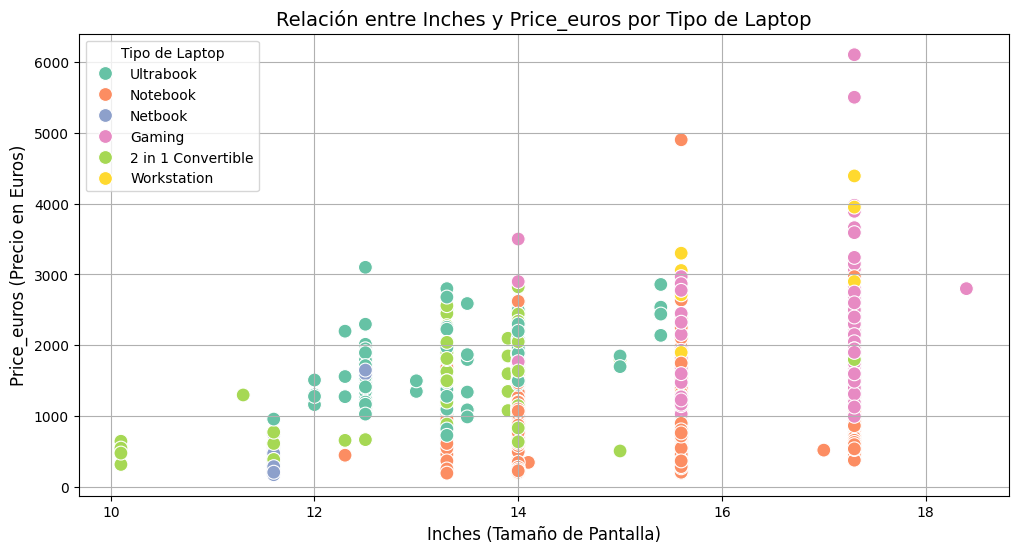

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 1. Diagrama de dispersi√≥n: Inches vs Price_euros
plt.figure(figsize=(12, 6))
sns.scatterplot(data=laptop_data, x="Inches", y="Price_euros", hue="TypeName", palette="Set2", s=100)
plt.title("Relaci√≥n entre Inches y Price_euros por Tipo de Laptop", fontsize=14)
plt.xlabel("Inches (Tama√±o de Pantalla)", fontsize=12)
plt.ylabel("Price_euros (Precio en Euros)", fontsize=12)
plt.legend(title="Tipo de Laptop")
plt.grid(True)
plt.show()



**Gr√°fico de dispersi√≥n**
  - Laptops con tama√±os m√°s peque√±os (menores a 13") parecen tener precios m√°s bajos, aunque existen excepciones, como ciertos dispositivos `Gaming` o `Workstation`.
  - En los tama√±os medianos (13-15"), los precios muestran una mayor dispersi√≥n, reflejando una combinaci√≥n de laptops m√°s costosas (principalmente `Gaming` y `Workstation`) junto con dispositivos m√°s accesibles (`Notebook`, `Ultrabook`).
  - Las laptops con pantallas grandes (>15") tambi√©n tienen precios variados, aunque hay un grupo de precios m√°s bajos dominado por `Notebook` y `Ultrabook`. Y las laptops `Gaming` predominan con precios muy elevados

**Conclusiones**
1. **Relaci√≥n inversa con `Inches`**:
   - La tendencia general muestra que los precios no siempre aumentan con el tama√±o de la pantalla. De hecho, las laptops grandes tienen una media de precios similar a las peque√±as, lo que sugiere que otros factores (como el tipo de laptop o el hardware interno) son m√°s influyentes.

2. **Tipo de Laptop**:
   - Los dispositivos `Gaming` y `Workstation` parecen ser los m√°s costosos en cualquier tama√±o de pantalla, mientras que `Notebook` y `Ultrabook` dominan los rangos de precios m√°s accesibles.

In [44]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Supongamos que los datos est√°n cargados previamente en un DataFrame llamado `laptop_data`.

# Crear la columna 'Inches_Group' si no existe
bins = [0, 13, 15, float('inf')]
labels = ["Peque√±a (<13\")", "Mediana (13-15\")", "Grande (>15\")"]

if 'Inches_Group' not in laptop_data.columns:
    laptop_data['Inches_Group'] = pd.cut(laptop_data['Inches'], bins=bins, labels=labels, right=False)

# Aseguramos que 'Inches_Group' sea categ√≥rica con el orden correcto
laptop_data['Inches_Group'] = pd.Categorical(laptop_data['Inches_Group'], categories=labels)

# Ajustamos el modelo ANOVA
modelo = ols('Price_euros ~ C(Inches_Group)', data=laptop_data).fit()
anova_resultados = anova_lm(modelo)

# Mostramos los resultados del ANOVA
print(anova_resultados)


                     df        sum_sq       mean_sq          F   PR(>F)
C(Inches_Group)     2.0  1.122794e+07  5.613970e+06  11.623147  0.00001
Residual         1272.0  6.143749e+08  4.829992e+05        NaN      NaN


**Conclusi√≥n estad√≠stica:**

- El valor p **0.00001** sugiere que las diferencias en los precios (`Price_euros`) entre los grupos de tama√±os de pantalla (`Inches_Group`) son estad√≠sticamente significativas. Esto significa que, en promedio, al menos uno de los grupos tiene un precio significativamente diferente al resto.

**Implicaciones pr√°cticas:**
- `Influencia del tama√±o de la pantalla en el precio:`

  Los resultados indican que el tama√±o de la pantalla (agrupado en Peque√±a, Mediana y Grande) afecta significativamente el precio de las laptops.
  
- `Varianza dentro de los grupos:`

  Aunque el modelo muestra diferencias significativas, la suma de cuadrados residual (6.143749e+08) es mucho mayor que la suma de cuadrados entre grupos (1.122794e+07), lo que indica que todav√≠a hay una gran parte de la varianza en los precios que no est√° explicada solo por el tama√±o de la pantalla. Otros factores, como la marca, el procesador, la memoria RAM, etc., probablemente tambi√©n influyen en el precio.


In [45]:
# Importamos la funci√≥n para an√°lisis post hoc de Tukey
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizamos la prueba de Tukey para las comparaciones entre grupos de Inches_Group
tukey_resultados = pairwise_tukeyhsd(
    endog=laptop_data['Price_euros'],  # Variable dependiente (precios)
    groups=laptop_data['Inches_Group'],  # Grupos categ√≥ricos (tama√±os de pantalla)
    alpha=0.05  # Nivel de significancia
)

# Mostramos los resultados del an√°lisis de Tukey
tukey_resultados.summary()


<class 'statsmodels.iolib.table.SimpleTable'>

Los resultados del an√°lisis post hoc utilizando la prueba de Tukey indican lo siguiente:

1. **Comparaci√≥n entre "Grande (>15") y "Mediana (13-15")**:
   - **p-ajustada (p-adj):** 0.0 (significativo)
   - **Conclusi√≥n:** Existe una diferencia estad√≠sticamente significativa en el precio medio entre laptops "Grandes (>15") y "Medianas (13-15")". Esto implica que el precio promedio de laptops grandes es significativamente mayor al de las medianas.

2. **Comparaci√≥n entre "Grande (>15") y "Peque√±a (<13")**:
   - **p-ajustada (p-adj):** 0.9846 (no significativo)
   - **Conclusi√≥n:** No hay evidencia de una diferencia estad√≠sticamente significativa en el precio medio entre laptops "Grandes (>15") y "Peque√±as (<13")". Las medias parecen ser similares.

3. **Comparaci√≥n entre "Mediana (13-15") y "Peque√±a (<13")**:
   - **p-ajustada (p-adj):** 0.0235 (significativo)
   - **Conclusi√≥n:** Existe una diferencia estad√≠sticamente significativa en el precio medio entre laptops "Medianas (13-15") y "Peque√±as (<13")". Las laptops peque√±as tienen precios promedio significativamente m√°s bajos que las medianas.

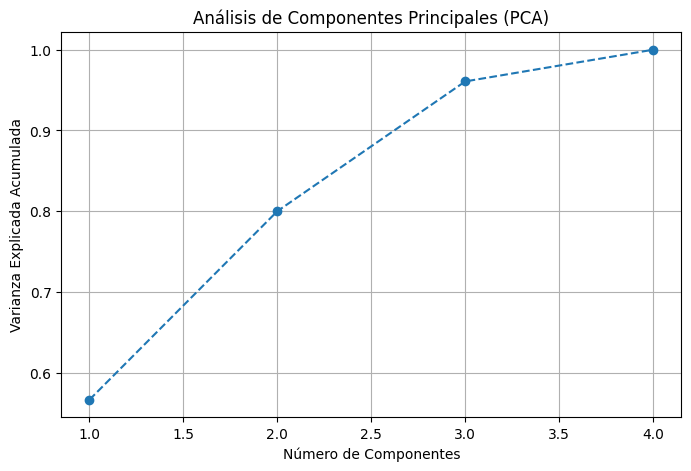

Componente Principal 1: 56.64% de la varianza explicada
Componente Principal 2: 23.36% de la varianza explicada
Componente Principal 3: 16.08% de la varianza explicada
Componente Principal 4: 3.93% de la varianza explicada


In [47]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las variables num√©ricas relevantes
variables_numericas = ['Ram', 'CPU_freq', 'Weight', 'Inches']
X = laptop_data[variables_numericas]

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Proporci√≥n de varianza explicada
varianza_explicada = pca.explained_variance_ratio_

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_explicada) + 1), varianza_explicada.cumsum(), marker='o', linestyle='--')
plt.xlabel('N√∫mero de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('An√°lisis de Componentes Principales (PCA)')
plt.grid()
plt.show()

# Resultados del PCA
for i, ratio in enumerate(varianza_explicada):
    print(f"Componente Principal {i+1}: {ratio:.2%} de la varianza explicada")
